# Data Preprocessing
Data preprocessing involves cleaning and preparing the data by handling missing values, duplicates, encoding categorical variables, scaling features, and addressing outliers. This step ensures the data is ready for modeling, enhancing the accuracy of machine learning algorithms.

In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import sys
sys.path.append(r'E:\USW\Project\car_insurance_claim_prediction\src')

import os
os.chdir(r'E:\USW\Project\car_insurance_claim_prediction\notebooks')

import importlib
import data_processing as dp

# Reload if the module was modified
importlib.reload(dp)

<module 'data_processing' from 'E:\\USW\\Project\\car_insurance_claim_prediction\\src\\data_processing.py'>

## **1. 🗃 Basic data preprocessing**

In [2]:
# Define file paths
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

# Load datasets
train_df, test_df = dp.load_data(train_path, test_path)

**Check for Leakage**

Policy IDs should NEVER overlap 

Expected Outcomes
- Success: No output (means zero overlap)
- Failure: Clear error message showing exactly which IDs leaked


In [3]:
# Check overlap 
overlap = set(train_df['policy_id']).intersection(set(test_df['policy_id']))
assert len(overlap) == 0, f"Data leakage: {len(overlap)} overlapping policy_ids found"

### **1.1 🗂 General Information & Structure**
#### **1.1.1 📁 Shows data types, non-null values, memory usage.**

In [4]:
# Display train data info
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
# Display test data info
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         39063 non-null  object 
 1   policy_tenure                     39063 non-null  float64
 2   age_of_car                        39063 non-null  float64
 3   age_of_policyholder               39063 non-null  float64
 4   area_cluster                      39063 non-null  object 
 5   population_density                39063 non-null  int64  
 6   make                              39063 non-null  int64  
 7   segment                           39063 non-null  object 
 8   model                             39063 non-null  object 
 9   fuel_type                         39063 non-null  object 
 10  max_torque                        39063 non-null  object 
 11  max_power                         39063 non-null  object 
 12  engi

The training dataset has 58,592 rows and 44 columns, while the test dataset contains 39,063 rows and 43 columns. Both datasets have no missing values and include a mix of numerical (e.g., age of car, policyholder, displacement) and categorical features (e.g., fuel type, segment, engine type). The training data includes a target variable is_claim, but the test data does not. The data types consist of floating point numbers, integers, and objects (for categorical variables). The training dataset uses 19.7 MB of memory, and the test dataset uses 12.8 MB.

#### **1.1.2 🧮 Lists all column names**

In [6]:
# Display train Columns
display(train_df.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [7]:
# Display test Columns
display(test_df.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

### **1.2. 📂Preview Data - First 10 rows**

In [44]:
display(train_df.head(10))

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231             0   
1       0.672619        0.02             0.375000            11   
2       0.841110        0.02             0.384615            15   
3       0.900277        0.11             0.432692            16   
4       0.596403        0.11             0.634615            17   
5       1.018709        0.07             0.519231            18   
6       0.097992        0.16             0.403846            19   
7       0.509085        0.14             0.423077            20   
8       0.282394        0.07             0.298077            19   
9       0.566255        0.04             0.442308            21   

   population_density  make  segment  model  fuel_type  engine_type  ...  \
0              4990.0     0        0      0          0            6  ...   
1             27003.0     0        0      0          0            6  ...   
2              4076.0     0        0      0          0            6  ...   
3             21622.0     0        3      3          2            2  ...   
4             34738.0     1        0      4          2            0  ...   
5             13051.0     2        4      5          1            3  ...   
6              6112.0     3        2      6          1            4  ...   
7              8794.0     0        2      7          2            8  ...   
8              6112.0     2        4      5          1            3  ...   
9             17804.0     0        2      8          2            1  ...   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1          0.0   
1                              0       0               1          0.0   
2                              0       0               1          0.0   
3                              1       1               1          1.0   
4                              1       1               1          1.0   
5                              0       1               1          2.0   
6                              0       1               1          4.0   
7                              1       1               1          1.0   
8                              0       1               1          2.0   
9                              1       1               1          0.0   

   is_claim  torque_value  torque_rpm  power_value  power_rpm    car_volume  
0       0.0          60.0        3500        40.36       6000  7.698283e+09  
1       0.0          60.0        3500        40.36       6000  7.698283e+09  
2       0.0          60.0        3500        40.36       6000  7.698283e+09  
3       0.0         113.0        4400        88.50       6000  1.050096e+10  
4       0.0          91.0        4250        67.06       5500  8.777961e+09  
5       0.0         250.0        2750       113.45       4000  1.258460e+10  
6       0.0         200.0        3000        88.77       4000  1.066473e+10  
7       0.0         113.0        4400        88.50       6000  1.020674e+10  
8       0.0         250.0        2750       113.45       4000  1.258460e+10  
9       0.0         113.0        4400        88.50       6000  1.044382e+10  

[10 rows x 43 columns]

#### 1.2.1 🕸️Unique values of Categorical data

In [9]:
# Display unique values of categorical columns excluding 'policy_id'
for col in train_df.select_dtypes(include=['object']).columns:
    if col != 'policy_id':
        print(f"Unique values in {col}: {train_df[col].unique()}")


Unique values in area_cluster: ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
Unique values in segment: ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
Unique values in model: ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
Unique values in fuel_type: ['CNG' 'Petrol' 'Diesel']
Unique values in max_torque: ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
Unique values in max_power: ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
Unique values in engine_type: ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
Unique values in is_esc: ['No' 'Yes']
Un

This provided a better understanding of each column. For example, which columns were categorical or binary, and how their values were represented, such as "True/False", "Yes/No", or "1/0". It also helped identify incorrect data, NaN values, and other missing entries.

### **1.3. 🧺Checking Memory Usage - Memory usage per column**

In [10]:
display(train_df.memory_usage(deep=True))

Index                                   132
policy_id                           3281152
policy_tenure                        468736
age_of_car                           468736
age_of_policyholder                  468736
area_cluster                        3004784
population_density                   468736
make                                 468736
segment                             2976916
model                               2989764
fuel_type                           3161570
max_torque                          3618347
max_power                           3822861
engine_type                         3722578
airbags                              468736
is_esc                              3006593
is_adjustable_steering              3023718
is_tpms                             3002210
is_parking_sensors                  3044411
is_parking_camera                   3011080
rear_brakes_type                    3105376
displacement                         468736
cylinder                        

Memory usage for columns (e.g., policy_id: 3,281,152 bytes) depends on data types. Object columns (like policy_id, area_cluster, fuel_type) use more memory because they store variable-length strings, while numerical columns (int64, float64) consume less memory. To optimize, convert object columns with few unique values to category types, reducing memory usage without compromising performance.

### 1.4 🧾 Missing Values
#### 1.4.1 🧪Check Missing Values

In [11]:
# Check missing values -Shows count of missing values per column
display(train_df.isnull().sum())
display(test_df.isnull().sum())

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

#### 1.4.2 📊 Bar Chart of missing values
**The number of missing values in each column is indicated by this bar chart**

<Axes: >

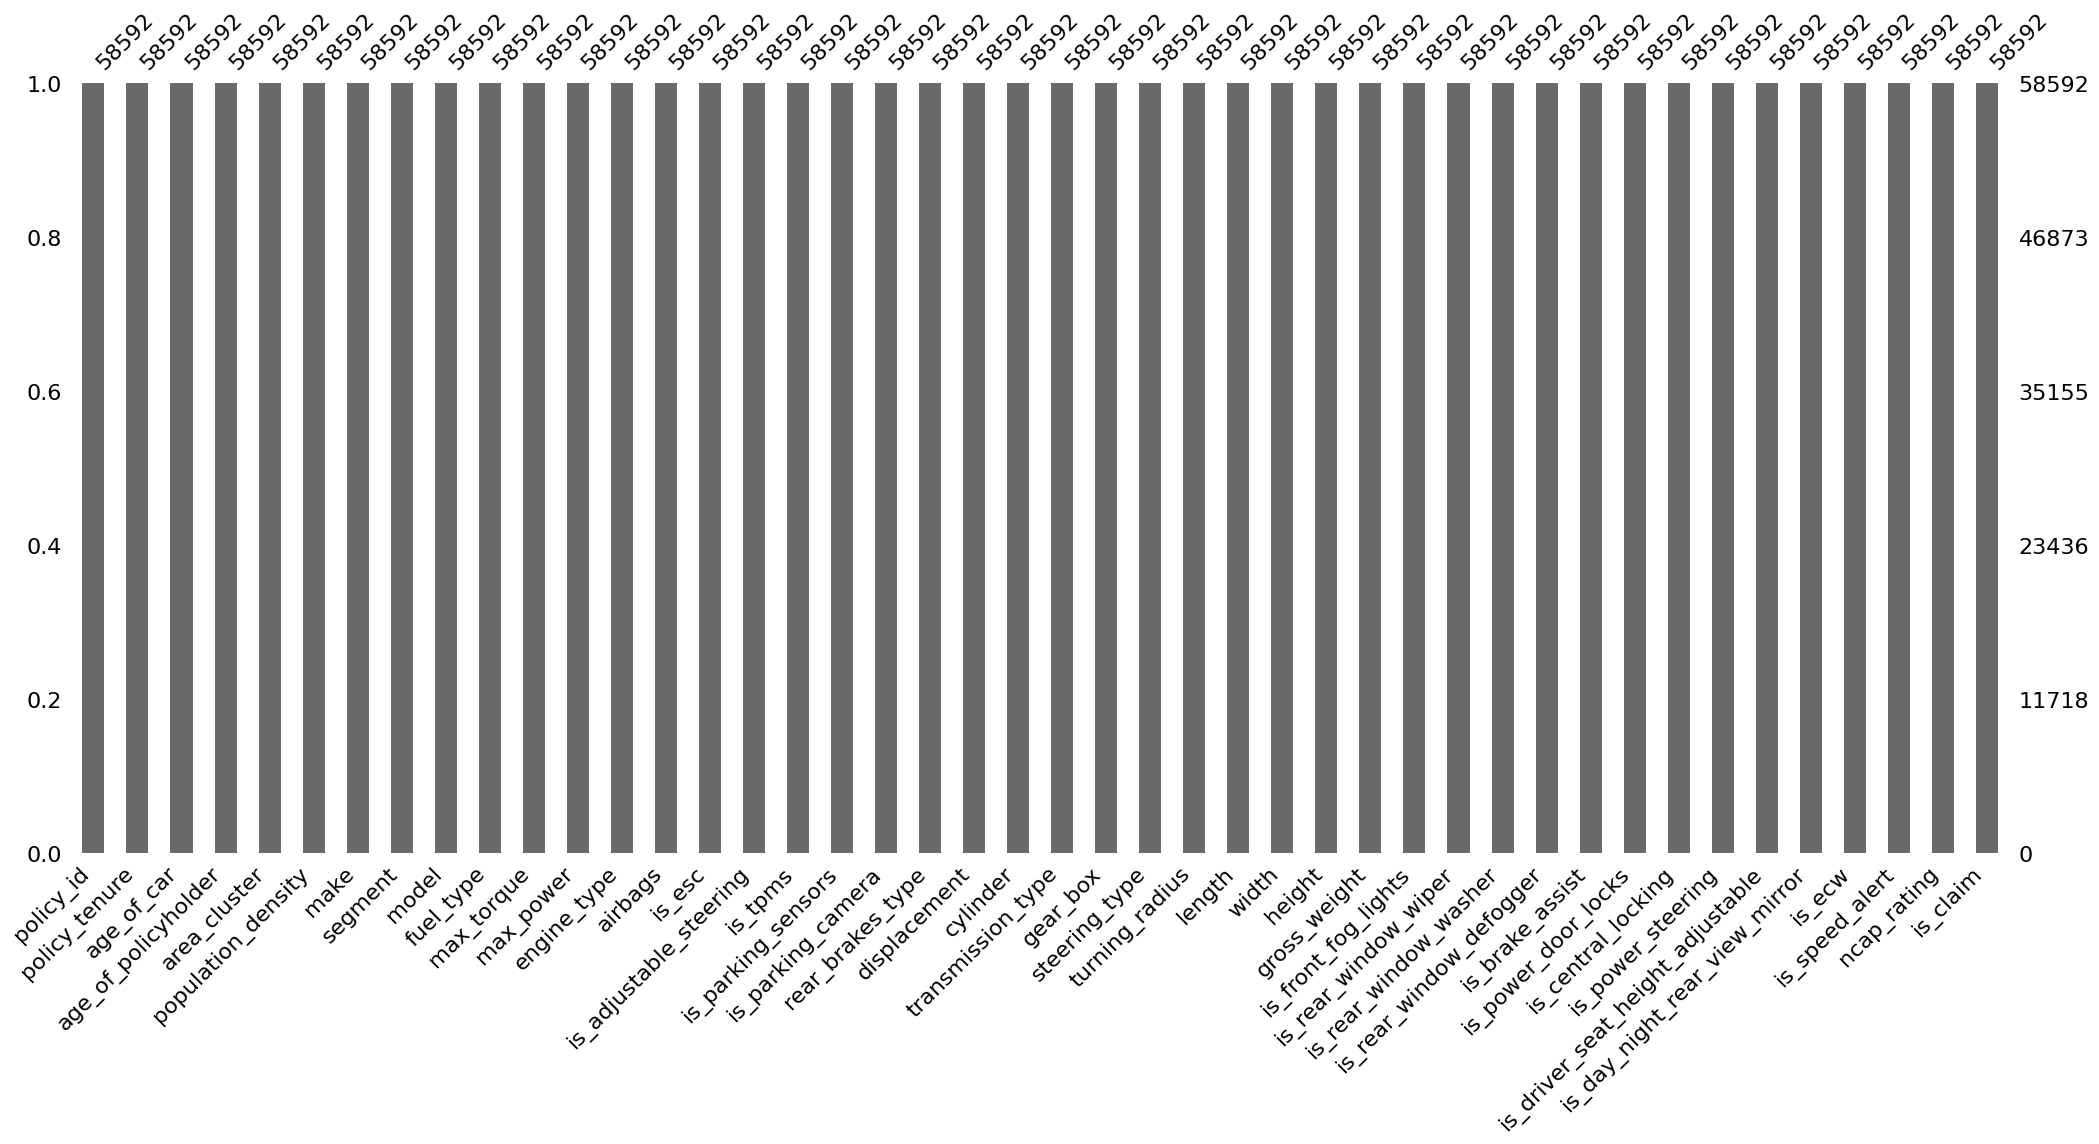

In [12]:
# Visualize the number of missing 
# values as a bar chart
msno.bar(train_df)

<Axes: >

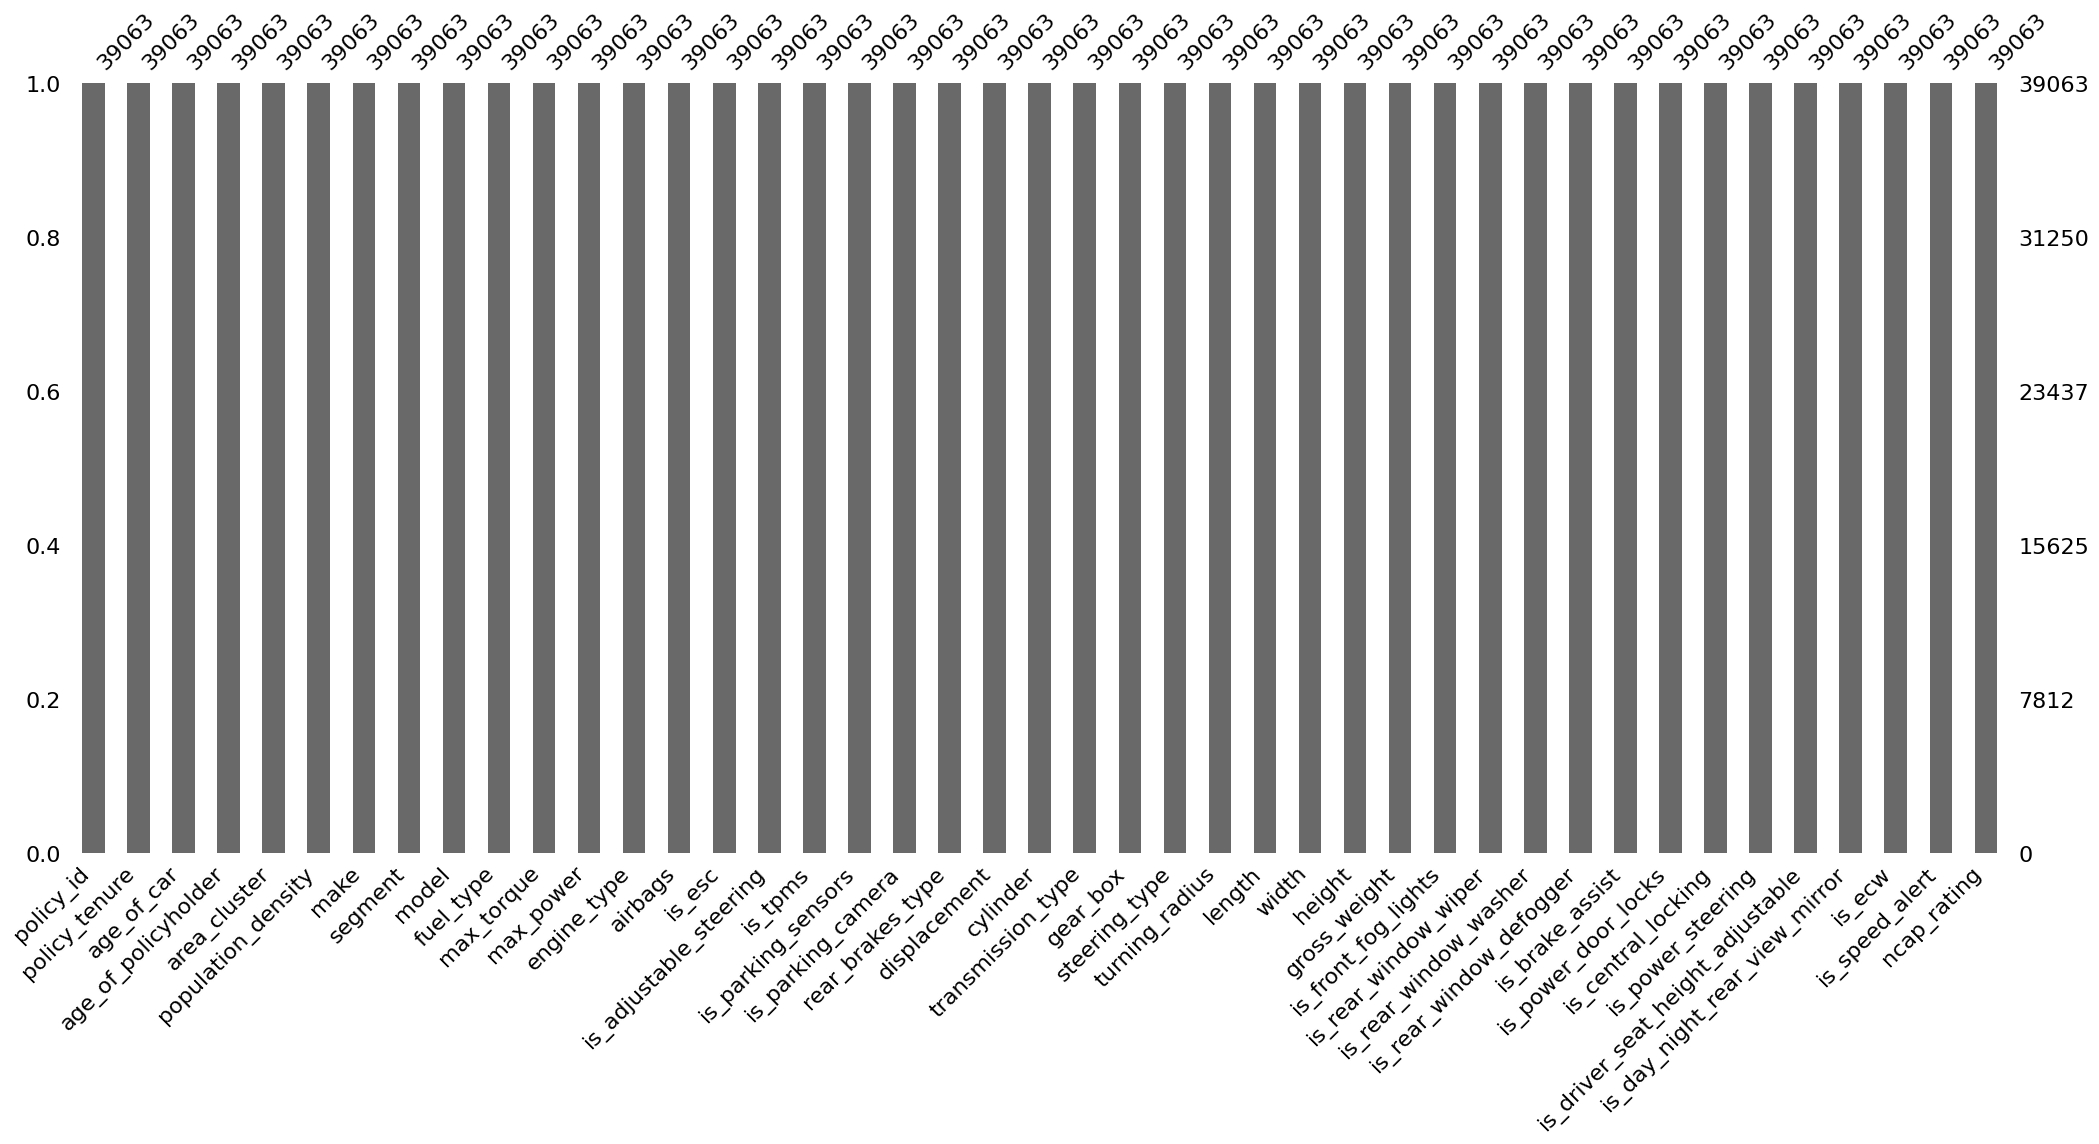

In [13]:
msno.bar(test_df) 

#### 1.4.3 ❌Handle Missing Values

In [14]:
train_df = dp.handle_missing_values(train_df)
test_df = dp.handle_missing_values(test_df)

Missing values before imputation: Categorical: 0, Numerical: 0
Missing values after imputation: Categorical: 0, Numerical: 0
Missing values before imputation: Categorical: 0, Numerical: 0
Missing values after imputation: Categorical: 0, Numerical: 0


The assumption of no missing values in the dataset was confirmed through the info() function. However, to verify this assumption further since missing values can introduce significant bias and affect the modeling process the isnull().sum() function was used. Additionally, the missingno library was utilized to visualize any missing data.

Although no missing values were found, a missing value handling function was created using a basic approach: categorical variables are imputed with the mode, and numerical variables with the mean.

### 1.5 🔄 Handle duplicate data 
#### 1.5.1 🔴In Train dataset

In [15]:
train_df = dp.remove_duplicates(train_df)

Number of duplicate rows: 0
Dataset shape after removing duplicates: (58592, 44)
Number of duplicate rows after removing rows: 0


#### 1.5.2. 🟡In Test dataset

In [16]:
test_df = dp.remove_duplicates(test_df)

Number of duplicate rows: 0
Dataset shape after removing duplicates: (39063, 43)
Number of duplicate rows after removing rows: 0


By using the duplicated().sum() function, it was confirmed that there are no duplicate values in the dataset. However, any potential duplicates were handled by removing the rows, just to be cautious.

### 1.6 🎯 Feature Encoding (Binary Data)

In [17]:
train_df = dp.Feature_engineering(train_df)

Numeric_train_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Categorical_train_features = train_df.select_dtypes(include=['object']).columns.tolist()
Boolean_train_features = train_df.select_dtypes(include=['int8']).columns.tolist()

Numeric_train_df= train_df[Numeric_train_features]
Categorical_train_df= train_df[Categorical_train_features] 
Boolean_train_df= train_df[Boolean_train_features]

display("Categorical features:", Categorical_train_features)
display("Boolean features:", Boolean_train_features)
display("Numeric features:", Numeric_train_features)
print()
train_df.info()

'Categorical features:'

['area_cluster',
 'segment',
 'model',
 'fuel_type',
 'engine_type',
 'rear_brakes_type',
 'transmission_type',
 'steering_type']

'Boolean features:'

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

'Numeric features:'

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'gross_weight',
 'ncap_rating',
 'is_claim',
 'torque_value',
 'torque_rpm',
 'power_value',
 'power_rpm',
 'car_volume']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  float64
 11  is_esc                            58592 non-null  int8   
 12  is_

In [18]:
test_df = dp.Feature_engineering(test_df)

Numeric_test_features = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
Categorical_test_features = test_df.select_dtypes(include=['object']).columns.tolist()
Boolean_test_features = test_df.select_dtypes(include=['int8']).columns.tolist()

Numeric_test_df= test_df[Numeric_test_features]
Categorical_test_df= test_df[Categorical_test_features]
Boolean_test_df= test_df[Boolean_test_features]

print("Categorical features:", Categorical_train_features)
print("Boolean features:", Boolean_train_features)
print("Numeric features:", Numeric_train_features)
print()
test_df.info()

Categorical features: ['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type', 'rear_brakes_type', 'transmission_type', 'steering_type']
Boolean features: ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']
Numeric features: ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'gross_weight', 'ncap_rating', 'is_claim', 'torque_value', 'torque_rpm', 'power_value', 'power_rpm', 'car_volume']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  

"In the feature engineering process, the following steps were performed using custom functions:
- The 'policy_id' column was dropped in train data.
- The 'Yes'/'No' columns were converted to binary values (1/0).
- The max_torque and max_power values were parsed.
- The car_volume new feature was created and length, width, height were dropped.

These steps were carried out before the exploratory data analysis (EDA) to ensure more reliable results. Categorical encoding was performed after the EDA to avoid plot overlapping."

**Key findings from this step:**

1. Numerical Columns (float64, int64): There are 18 float64 columns and 2 int64 columns. These take up more memory compared to integer types with fewer bits. For example, each float64 takes 8 bytes of memory, and int64 also uses 8 bytes per value.
*Numerical Columns - ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'engine_type', 'airbags', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim', 'torque_value', 'torque_rpm', 'power_value', 'power_rpm']*

2. Categorical Columns (object): There are 8 object columns (e.g., area_cluster, segment, fuel_type). These columns typically store string data and take up more memory. For large datasets with many categories, converting these to category type can save memory.
*Categorical Columns -*

3. Boolean Columns (int8): There are 17 columns with binary values (1 or 0), stored as int8 (1 byte per value). These are memory-efficient for boolean indicators (e.g., is_esc, is_parking_sensors), but might be candidates for optimization in terms of memory if needed.
*Boolean Column - ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']*

## **2. 🏗️ EDA - Exploratory Data Analysis.**

### **2.1 🧭Univariate analysis**
#### 2.1.1 🔬Summary statistics (mean, min, max, etc.) for numeric columns.

In [19]:
# Statistics details for train data
display(Numeric_train_df.describe())

policy_tenure    age_of_car  age_of_policyholder  population_density  \
count   58592.000000  58592.000000         58592.000000        58592.000000   
mean        0.611246      0.069424             0.469420        18826.858667   
std         0.414156      0.056721             0.122886        17660.174792   
min         0.002735      0.000000             0.288462          290.000000   
25%         0.210250      0.020000             0.365385         6112.000000   
50%         0.573792      0.060000             0.451923         8794.000000   
75%         1.039104      0.110000             0.548077        27003.000000   
max         1.396641      1.000000             1.000000        73430.000000   

               make       airbags  displacement      cylinder      gear_box  \
count  58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean       1.763722      3.137066   1162.355851      3.626963      5.245443   
std        1.136988      1.832641    266.304786      0.483616      0.430353   
min        1.000000      1.000000    796.000000      3.000000      5.000000   
25%        1.000000      2.000000    796.000000      3.000000      5.000000   
50%        1.000000      2.000000   1197.000000      4.000000      5.000000   
75%        3.000000      6.000000   1493.000000      4.000000      5.000000   
max        5.000000      6.000000   1498.000000      4.000000      6.000000   

       turning_radius  gross_weight   ncap_rating      is_claim  torque_value  \
count    58592.000000  58592.000000  58592.000000  58592.000000  58592.000000   
mean         4.852893   1385.276813      1.759950      0.063968    134.450937   
std          0.228061    212.423085      1.389576      0.244698     73.146794   
min          4.500000   1051.000000      0.000000      0.000000     60.000000   
25%          4.600000   1185.000000      0.000000      0.000000     60.000000   
50%          4.800000   1335.000000      2.000000      0.000000    113.000000   
75%          5.000000   1510.000000      3.000000      0.000000    200.000000   
max          5.200000   1720.000000      5.000000      1.000000    250.000000   

         torque_rpm   power_value     power_rpm    car_volume  
count  58592.000000  58592.000000  58592.000000  5.859200e+04  
mean    3533.176031     78.976765   5307.163094  1.008774e+10  
std      725.960661     27.699259    916.770819  1.748449e+09  
min     1750.000000     40.360000   3600.000000  7.698283e+09  
25%     2750.000000     40.360000   4000.000000  7.698283e+09  
50%     3500.000000     88.500000   6000.000000  1.020674e+10  
75%     4400.000000     97.890000   6000.000000  1.066473e+10  
max     4400.000000    118.360000   6000.000000  1.258460e+10

1.	Data Consistency:
    - Count: All columns have the same number of non-null values (58,592), confirming that no missing data exists in the numerical features.
2.	Policy and Car Details:
    - The mean values for features like policy_tenure (0.61), age_of_car (0.07), and age_of_policyholder (0.47) indicate the typical tenure and age distribution within the dataset.
    - Max and Min values for policy_tenure (0.0027 to 1.3966) show there’s a wide range of policy durations, suggesting variation in the policyholders' lengths of coverage.
3.	Vehicle Characteristics:
    - Airbags have a mean of around 3.14, with a range from 1 to 6, implying variability in car safety features
    - Displacement and torque values range between 796 and 1498, indicating vehicle engine characteristics differ substantially across the dataset.
4.	Vehicle Dimensions:
    - The mean values for car_volume(length*width*height) and gross_weight reflect standard car dimensions, and the ranges suggest variability in vehicle types.
5.	Performance Metrics:
    - Torque_value and power_value have ranges from 60 to 250, indicating performance metrics vary significantly across the dataset.
    - Torque_rpm and power_rpm values are consistent, with means and ranges showing how power is distributed in vehicle engines.
6.	NCAP Rating and Claims:
    - The mean NCAP rating is around 1.76, indicating moderate safety ratings for the vehicles in the dataset.
    - The mean of is_claim is 0.06, suggesting that a small percentage of vehicles have made insurance claims (around 6%).

#### 2.1.2 📊 Histogram of numerical columns.

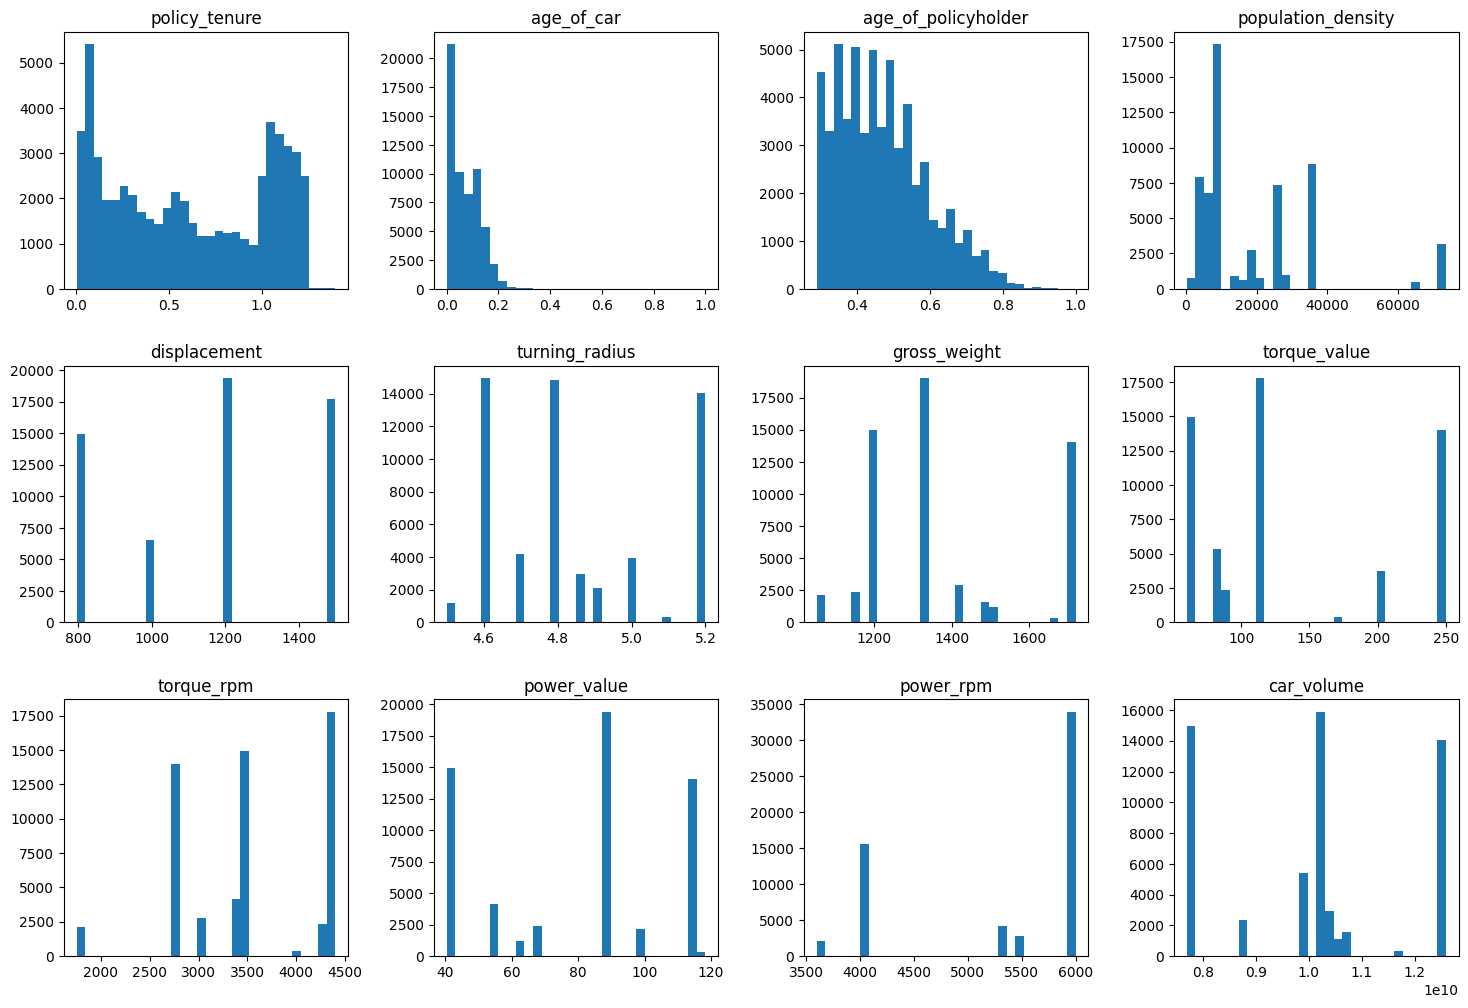

In [20]:
# Select only numerical columns
Numeric_train_df.drop(columns=['is_claim','make','airbags','gear_box','cylinder','ncap_rating'], errors='ignore').hist(figsize=(18, 12), bins=30, grid=False,layout=(-1, 4))
plt.show()

Below are some specific insights based on the visualized histograms in dataset:

1. Policy and Demographics
    - policy_tenure: Right-skewed distribution; most policyholders have shorter tenures.
    - age_of_car: Extremely right-skewed; majority of cars are quite new.
    - age_of_policyholder: Slightly right-skewed; more young-to-middle-aged policyholders.

1. Vehicle Make and Configuration
    - make: Few makes dominate (mode at 1 and 3); rest are rare.
    - airbags: Most vehicles have either 2 or 6 airbags.
    - cylinder, gear_box: Limited variation; most cars have 3 or 4 cylinders, and a gearbox with 5 gears.

3. Performance Metrics
    - displacement, torque_value, power_value: Bimodal or multi-peaked; engine performance varies across car segments.
    - torque_rpm, power_rpm: Clear peaks at standard values (e.g., 3500–6000 rpm), possibly manufacturer defaults.

1. Dimensions and Physical Specs
    - car_volume, gross_weight: Multiple clusters; dataset includes multiple types or classes of cars (compact, sedan, SUV, etc.).
    - turning_radius: Clearly clustered; likely standardized for specific models.
    - ncap_rating: Peaks at 0 and 3; significant number of vehicles lack safety ratings, while others meet mid-level standards.

5. Population and Claims
    - population_density: Strong right skew; some policyholders live in extremely dense areas.

#### 2.1.3 📈Explore Target Variable to Understand class imbalance.

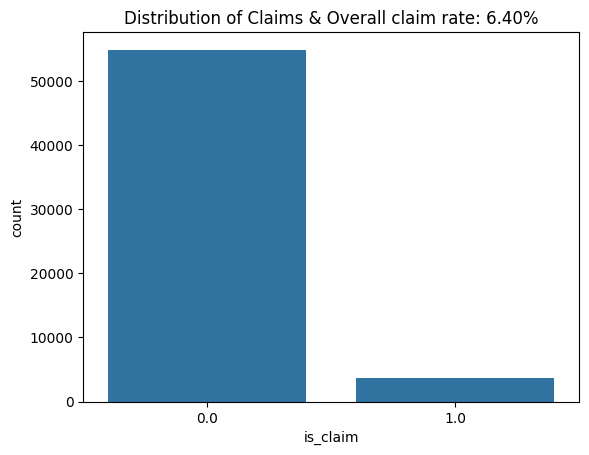

In [21]:
claim_rate = train_df['is_claim'].mean()
sns.countplot(data=train_df, x='is_claim')
plt.title(f"Distribution of Claims & Overall claim rate: {claim_rate:.2%}")
plt.show()

Only about 6% of records involve an insurance claim, which is typical in real-world datasets. This indicates a class imbalance that must be addressed during model training to prevent biased predictions.

#### 2.1.4 🔹 Analyses make,gear_box,cylinder

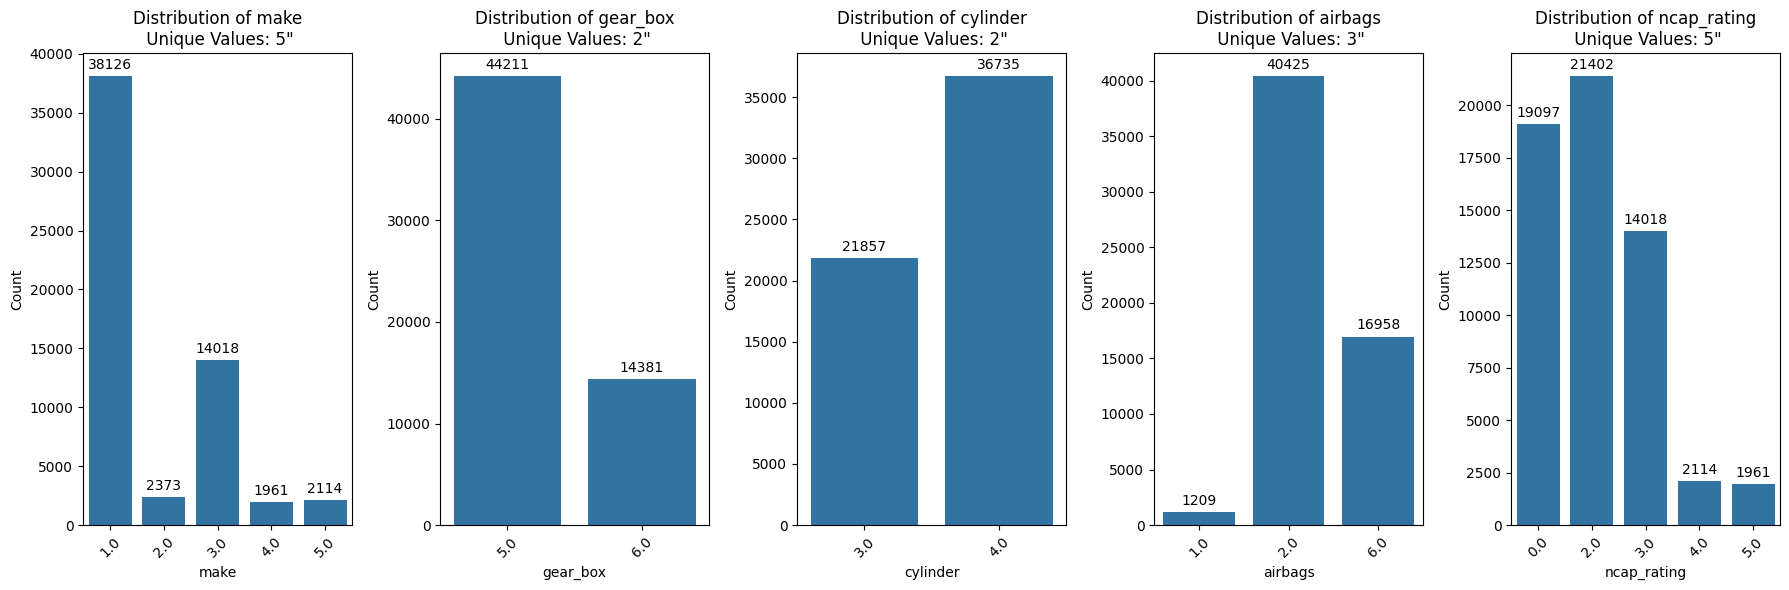

In [22]:
features = ['make', 'gear_box', 'cylinder','airbags','ncap_rating']

# Create subplots: 3 rows, 1 column
fig, axes = plt.subplots(ncols=5, figsize=(18,6))

for i, feature in enumerate(features):
    sns.countplot(data=train_df, x=feature, order=sorted(train_df[feature].dropna().unique()), ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}\n Unique Values: {train_df[feature].nunique()}"')
    for container in axes[i].containers:
        axes[i].bar_label(container, label_type='edge', padding=3)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Make - This is categorical, even if stored as integers**
- This likely represents the brand or manufacturer (e.g., Honda=1, Toyota=2, etc.).
- These are labels, not quantities. The value “2” isn't greater than “1” in any real sense — so treating it as numeric is misleading.

**Number of gears - The number of unique values is small**
- This is ordinal — there's a logical order and numeric meaning.
- Distribution is uneven or clustered (e.g., mostly 5 or 6).

**cylinder**
- Similar to gear_box, it's ordinal and often treated as numeric.
- But if there are only a few levels (e.g., mostly 3,4)

**Airbags**
- This is ordinal — there's a logical order and numeric meaning.
- Distribution is uneven or clustered (e.g., mostly 2 or 6).

**'ncap_rating**
- Ordinal column
- 


#### 2.1.5 📉Analyse categorical Features

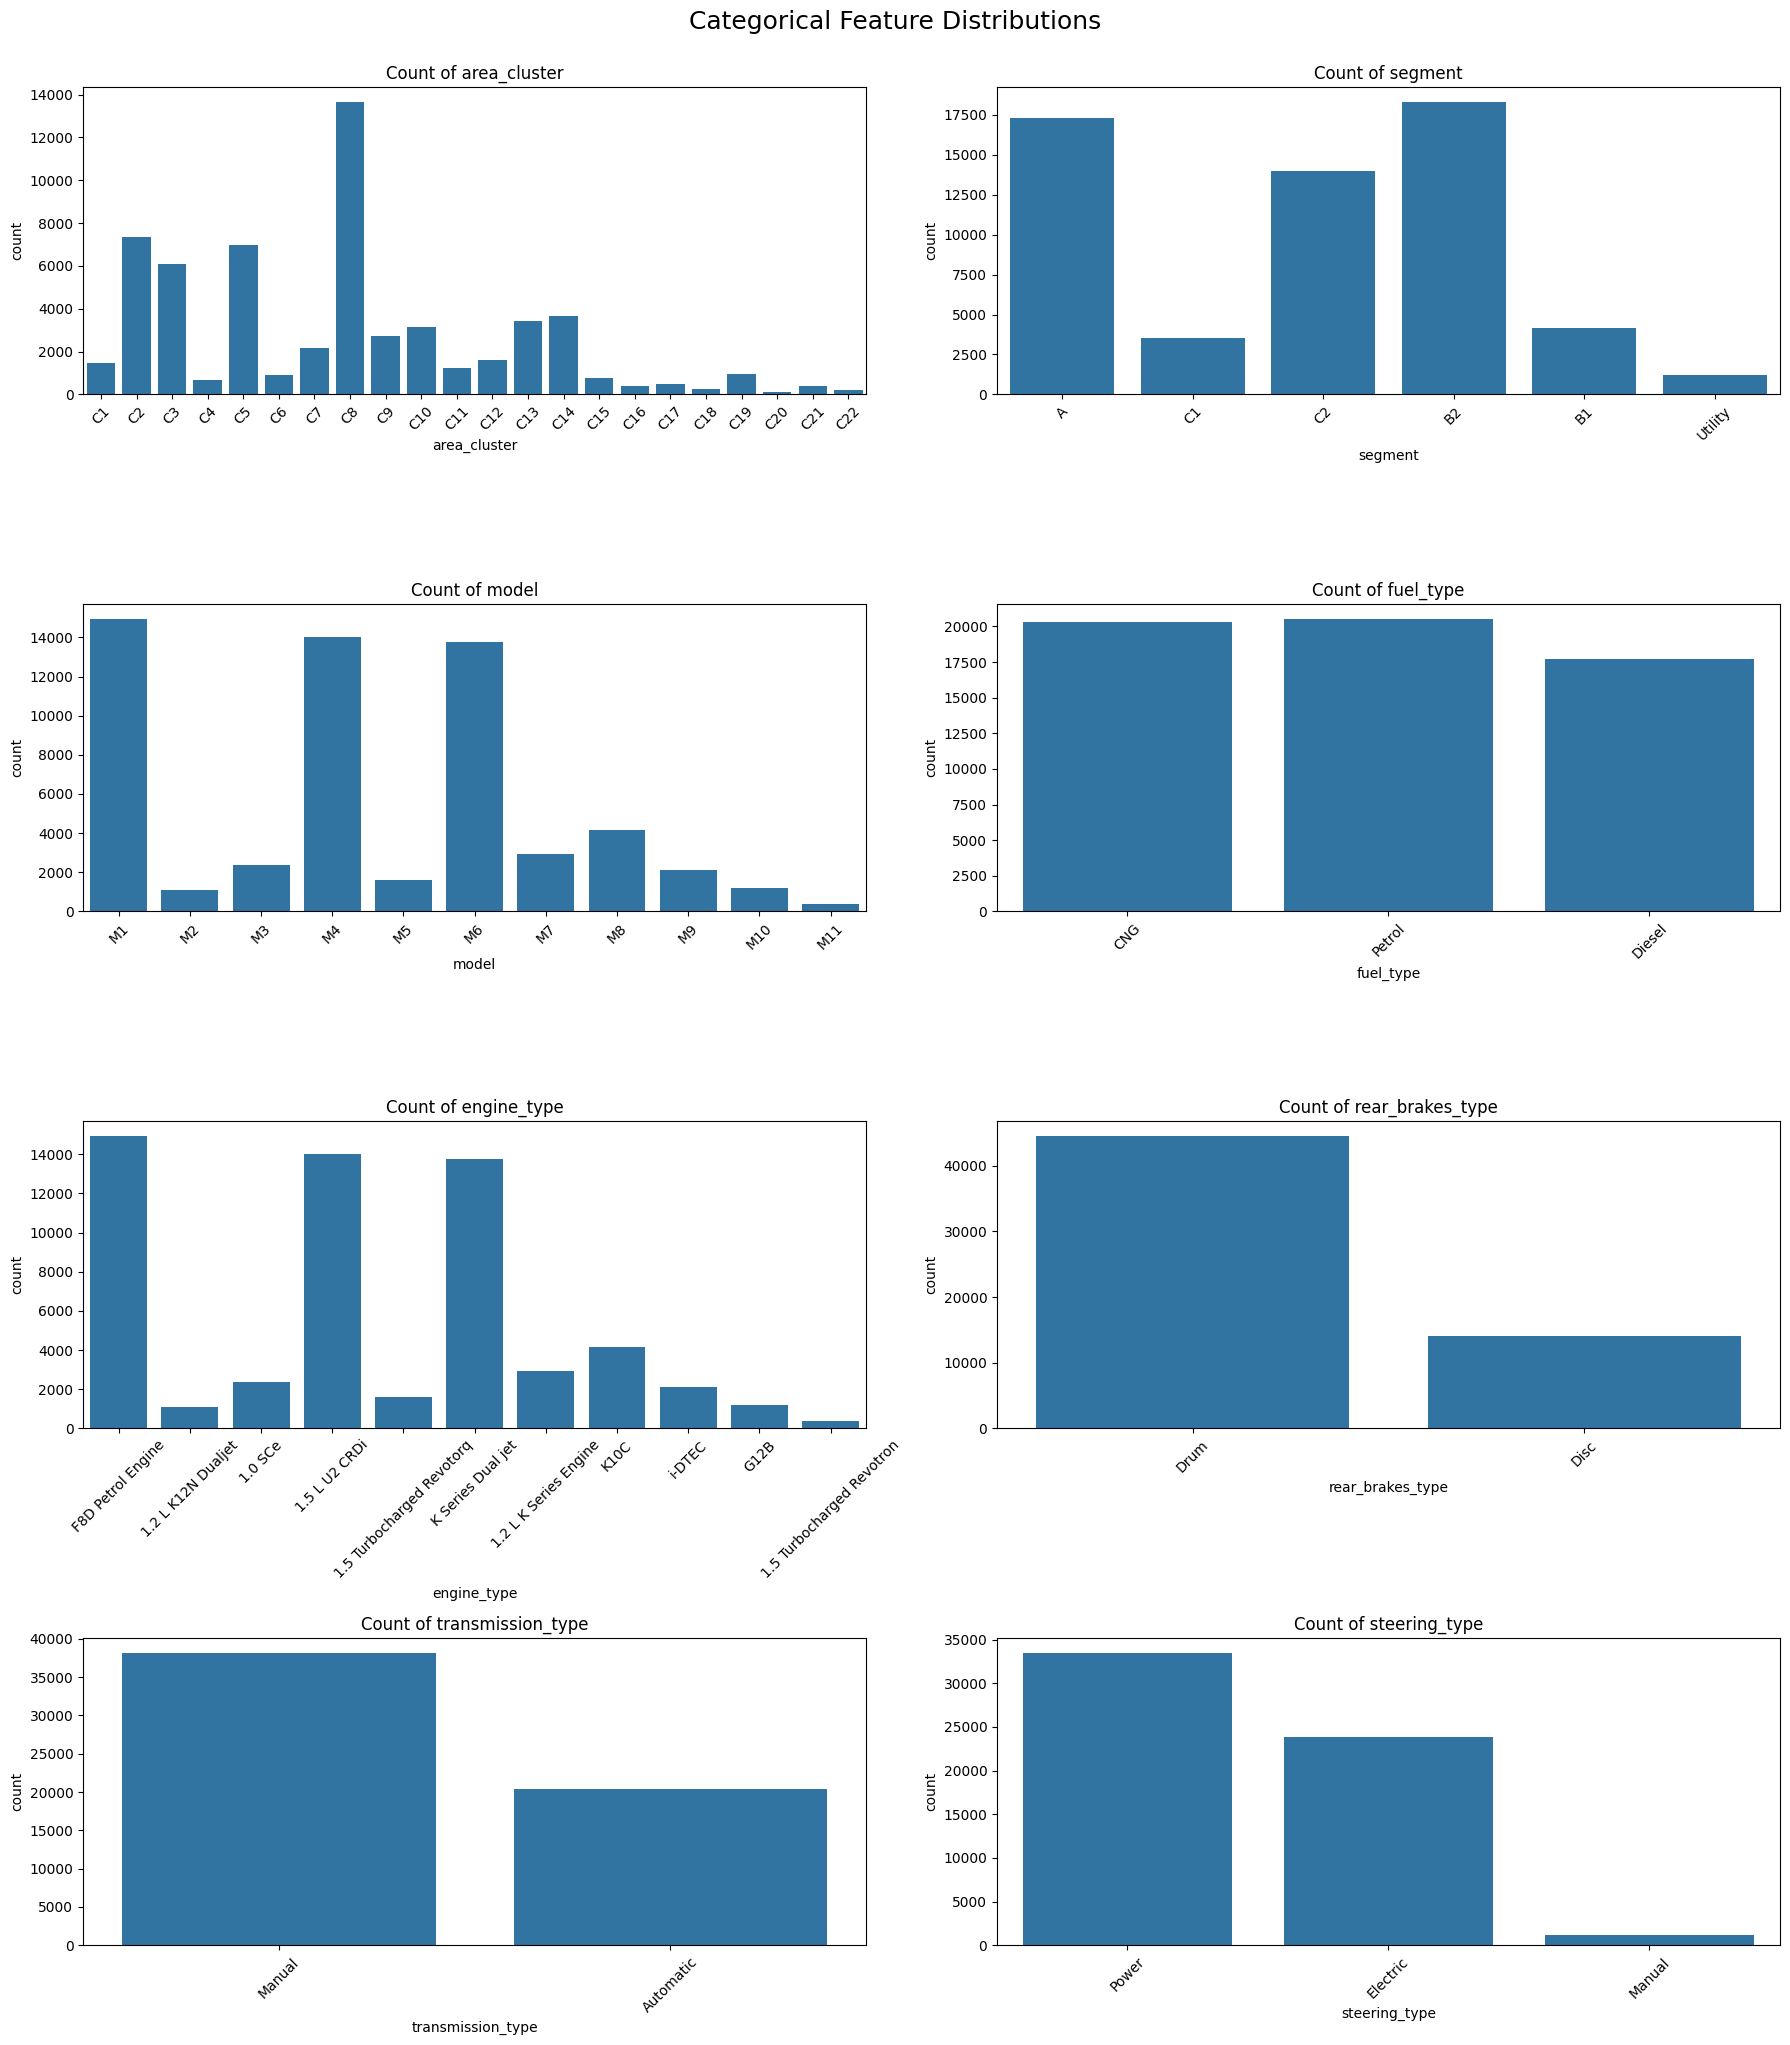

In [23]:
dp.plot_categorical_distributions(Categorical_train_df, Categorical_train_features)

Findings from the image:
- Segment: 'B2' and 'A' segments dominate. 'Luxury' segment has very low representation.
- Fuel Type: Fairly balanced between CNG, Petrol, and Diesel, but Petrol slightly leads.
- Transmission Type: Manual vehicles are significantly more common than Automatic.
- Rear Brakes Type: Most cars have Drum brakes, fewer have Disc.
- Steering Type: Power steering dominates; Manual steering is rare.
- Area Cluster: Some clusters like C9 and C2 are highly populated, while others (e.g., C20, C21) are sparse.
- Engine Type and Model: Some engine types (e.g., "F8D Petrol Engine") and models (e.g., "M1", "M5") dominate the dataset.


### 2.2 💡Bivariate analysis 
#### 2.2.1 🔗 Correlation between numerical features.

policy_tenure  age_of_car  age_of_policyholder  \
policy_tenure             1.000000    0.166312             0.143676   
age_of_car                0.166312    1.000000            -0.035427   
age_of_policyholder       0.143676   -0.035427             1.000000   
population_density       -0.100307   -0.062255             0.009669   
make                      0.086101    0.188122            -0.031989   
airbags                   0.103981    0.209073            -0.008041   
displacement              0.194361    0.393208            -0.023764   
cylinder                  0.191185    0.379522             0.004183   
gear_box                  0.095305    0.201579            -0.003115   
turning_radius            0.166426    0.332716            -0.016764   
gross_weight              0.141027    0.302127            -0.007758   
ncap_rating               0.173280    0.348853            -0.031628   
is_claim                  0.078747   -0.028172             0.022435   
torque_value              0.150604    0.308669            -0.015626   
torque_rpm                0.019754    0.017598             0.034706   
power_value               0.207171    0.409716            -0.011833   
power_rpm                -0.101081   -0.212649             0.037502   
car_volume                0.198064    0.398374            -0.024530   

                     population_density      make   airbags  displacement  \
policy_tenure                 -0.100307  0.086101  0.103981      0.194361   
age_of_car                    -0.062255  0.188122  0.209073      0.393208   
age_of_policyholder            0.009669 -0.031989 -0.008041     -0.023764   
population_density             1.000000 -0.035125 -0.060359     -0.090983   
make                          -0.035125  1.000000  0.501800      0.753344   
airbags                       -0.060359  0.501800  1.000000      0.661190   
displacement                  -0.090983  0.753344  0.661190      1.000000   
cylinder                      -0.091591  0.410672  0.478594      0.866231   
gear_box                      -0.056640  0.632807  0.859556      0.692240   
turning_radius                -0.077501  0.753861  0.810820      0.875407   
gross_weight                  -0.077816  0.481408  0.828988      0.776210   
ncap_rating                   -0.071150  0.792254  0.341557      0.847065   
is_claim                      -0.017808 -0.000456  0.002789      0.007678   
torque_value                  -0.075072  0.829837  0.800408      0.931233   
torque_rpm                    -0.000723 -0.772977 -0.424315     -0.411953   
power_value                   -0.096678  0.643805  0.694593      0.962626   
power_rpm                      0.049189 -0.928112 -0.670312     -0.795216   
car_volume                    -0.097003  0.617862  0.769284      0.944463   

                     cylinder  gear_box  turning_radius  gross_weight  \
policy_tenure        0.191185  0.095305        0.166426      0.141027   
age_of_car           0.379522  0.201579        0.332716      0.302127   
age_of_policyholder  0.004183 -0.003115       -0.016764     -0.007758   
population_density  -0.091591 -0.056640       -0.077501     -0.077816   
make                 0.410672  0.632807        0.753861      0.481408   
airbags              0.478594  0.859556        0.810820      0.828988   
displacement         0.866231  0.692240        0.875407      0.776210   
cylinder             1.000000  0.410163        0.615806      0.602978   
gear_box             0.410163  1.000000        0.861740      0.894639   
turning_radius       0.615806  0.861740        1.000000      0.823097   
gross_weight         0.602978  0.894639        0.823097      1.000000   
ncap_rating          0.598364  0.529688        0.779302      0.556270   
is_claim             0.013434 -0.000635        0.002724      0.003894   
torque_value         0.685863  0.885212        0.946552      0.850068   
torque_rpm          -0.039806 -0.590501       -0.419791     -0.375127   
power_value          0.875863  0.712370

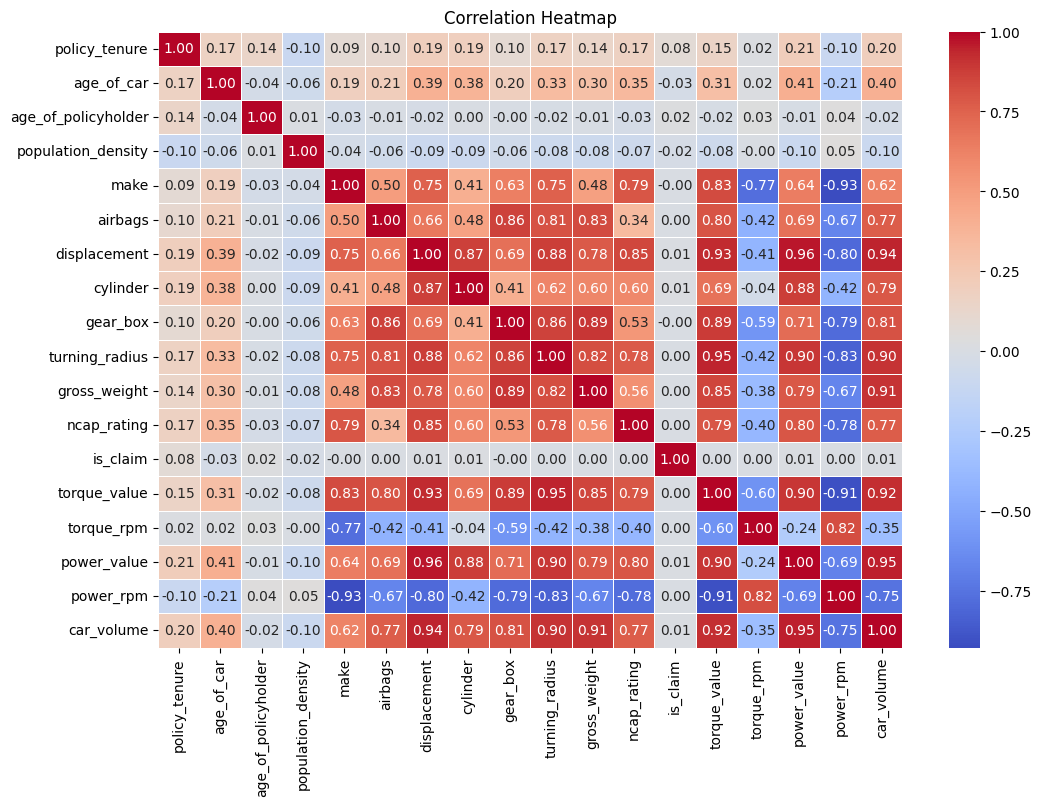

In [24]:
# For Train data
# Compute correlation only for numeric data
display(Numeric_train_df.corr())

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Numeric_train_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Key Findings 
1. Highly correlated groups:
    - Engine performance: displacement, cylinder, torque_value, power_value
    - Car size: car_volume(length * width *height) and gross_weight
    - Safety: airbags, ncap_rating, make
2. Weakly correlated with target:
    - is_claim — This is important: claims likely depend on nonlinear factors, combinations, or external risk behavior.

*A detailed check will be performed using feature selection methods.*


#### 2.2.2 🔁 Covariance between numerical features.

In [25]:
# Covariance for train data
display(Numeric_train_df.cov())

policy_tenure    age_of_car  age_of_policyholder  \
policy_tenure         1.715256e-01  3.906878e-03         7.312221e-03   
age_of_car            3.906878e-03  3.217232e-03        -2.469333e-04   
age_of_policyholder   7.312221e-03 -2.469333e-04         1.510094e-02   
population_density   -7.336500e+02 -6.236055e+01         2.098321e+01   
make                  4.054394e-02  1.213208e-02        -4.469424e-03   
airbags               7.892192e-02  2.173284e-02        -1.810775e-03   
displacement          2.143648e+01  5.939405e+00        -7.776774e-01   
cylinder              3.829288e-02  1.041069e-02         2.486043e-04   
gear_box              1.698663e-02  4.920527e-03        -1.647493e-04   
turning_radius        1.571939e-02  4.303932e-03        -4.698209e-04   
gross_weight          1.240707e+01  3.640255e+00        -2.025194e-01   
ncap_rating           9.972288e-02  2.749575e-02        -5.400726e-03   
is_claim              7.980511e-03 -3.910124e-04         6.746277e-04   
torque_value          4.562443e+00  1.280648e+00        -1.404534e-01   
torque_rpm            5.939185e+00  7.246310e-01         3.096121e+00   
power_value           2.376627e+00  6.437124e-01        -4.027939e-02   
power_rpm            -3.837917e+01 -1.105769e+01         4.224900e+00   
car_volume            1.434244e+08  3.950796e+07        -5.270565e+06   

                     population_density          make       airbags  \
policy_tenure             -7.336500e+02  4.054394e-02  7.892192e-02   
age_of_car                -6.236055e+01  1.213208e-02  2.173284e-02   
age_of_policyholder        2.098321e+01 -4.469424e-03 -1.810775e-03   
population_density         3.118818e+08 -7.052829e+02 -1.953491e+03   
make                      -7.052829e+02  1.292741e+00  1.045597e+00   
airbags                   -1.953491e+03  1.045597e+00  3.358574e+00   
displacement              -4.278940e+05  2.281015e+02  3.226881e+02   
cylinder                  -7.822553e+02  2.258141e-01  4.241754e-01   
gear_box                  -4.304685e+02  3.096365e-01  6.779172e-01   
turning_radius            -3.121431e+02  1.954780e-01  3.388851e-01   
gross_weight              -2.919225e+05  1.162708e+02  3.227211e+02   
ncap_rating               -1.746038e+03  1.251707e+00  8.698066e-01   
is_claim                  -7.695699e+01 -1.268129e-04  1.250615e-03   
torque_value              -9.697697e+04  6.901508e+01  1.072962e+02   
torque_rpm                -9.270259e+03 -6.380214e+02 -5.645199e+02   
power_value               -4.729218e+04  2.027582e+01  3.525948e+01   
power_rpm                  7.963930e+05 -9.674239e+02 -1.126199e+03   
car_volume                -2.995242e+12  1.228288e+09  2.465002e+09   

                     displacement      cylinder      gear_box  turning_radius  \
policy_tenure        2.143648e+01  3.829288e-02  1.698663e-02    1.571939e-02   
age_of_car           5.939405e+00  1.041069e-02  4.920527e-03    4.303932e-03   
age_of_policyholder -7.776774e-01  2.486043e-04 -1.647493e-04   -4.698209e-04   
population_density  -4.278940e+05 -7.822553e+02 -4.304685e+02   -3.121431e+02   
make                 2.281015e+02  2.258141e-01  3.096365e-01    1.954780e-01   
airbags              3.226881e+02  4.241754e-01  6.779172e-01    3.388851e-01   
displacement         7.091824e+04  1.115613e+02  7.933422e+01    5.316670e+01   
cylinder             1.115613e+02  2.338845e-01  8.536548e-02    6.791964e-02   
gear_box             7.933422e+01  8.536548e-02  1.852039e-01    8.457694e-02   
turning_radius       5.316670e+01  6.791964e-02  8.457694e-02    5.201174e-02   
gross_weight         4.390962e+04  6.194467e+01  8.178516e+01    3.987524e+01   
ncap_rating          3.134573e+02  4.021135e-01  3.167578e-01    2.469669e-01   
is_claim             5.003204e-01  1.589727e-03 -6.691477e-05    1.520278e-04   
torque_value         1.813981e+04  2.426239e+01  2.786556e+01    1.579031e+01   
torque_rpm          -7.964163e+04 -1.397521e+01 -1.844840e+02   -6.9

#### 2.2.3 🕵️Comparison with features
**1. Numeric Features Vs Target feature(is_claim)**

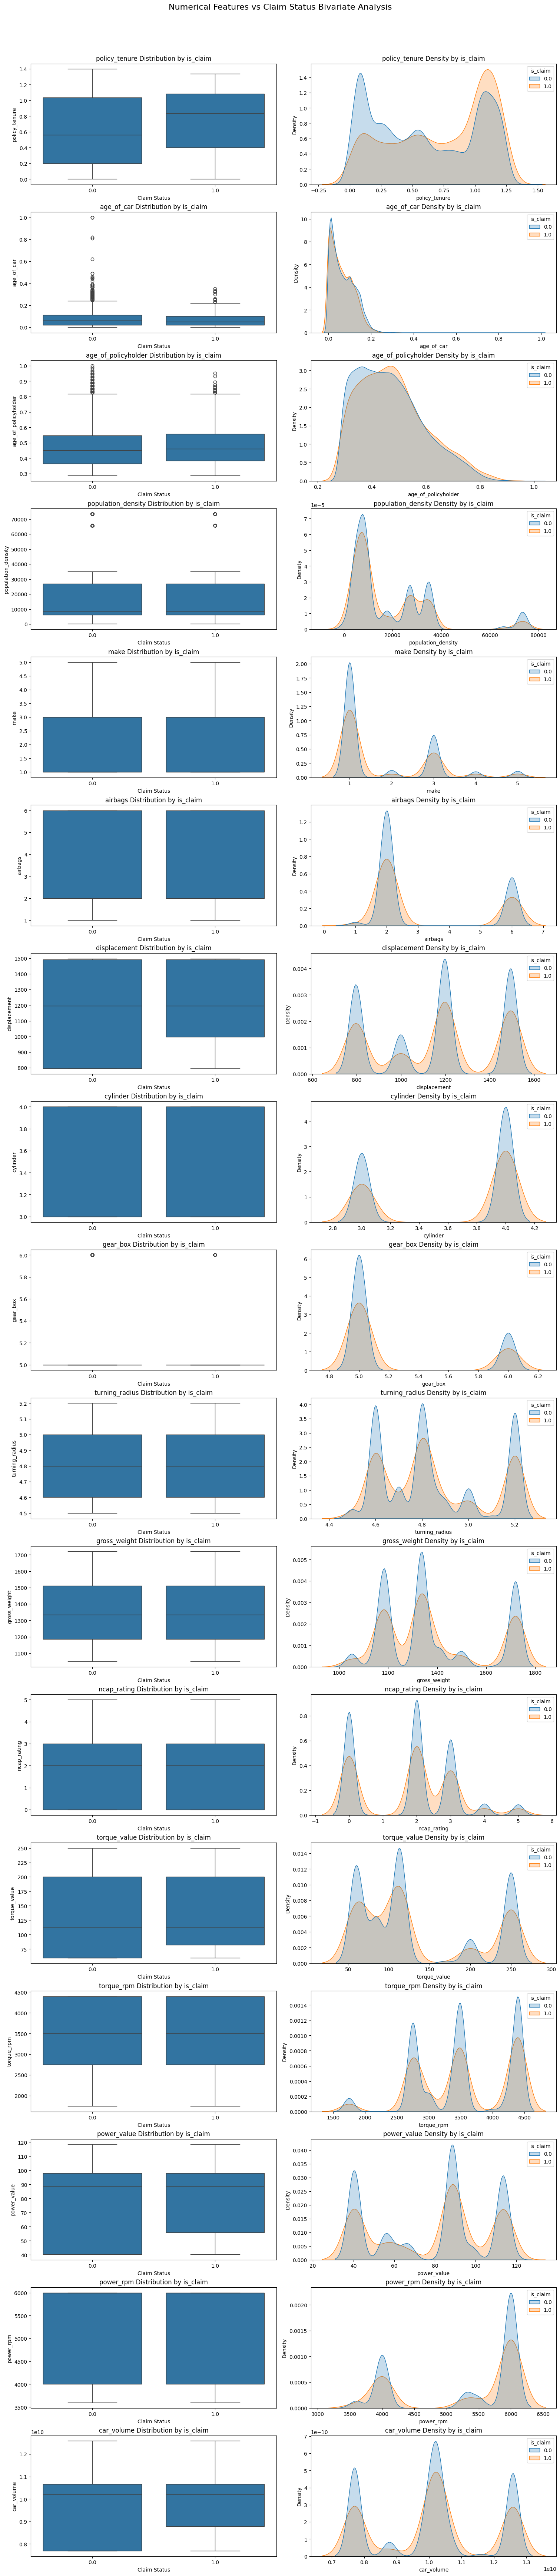

In [26]:
dp.plot_numerical_vs_target(train_df, Numeric_train_features)

Key Insights:
Most Predictive Numeric Features(Might Be):
* policy_tenure
* age_of_policyholder
* population_density
* displacement	
* gross_weight	
* ncap_rating
* power
* turning_radius
* airbags
* torque_value 
* power_value

Least Predictive Features(Might Be):
* cylinder
* gear_box
* make
* car_volume
* torque_rpm
* power_rpm

**2. Categorical Features Vs Target feature(is_claim)**

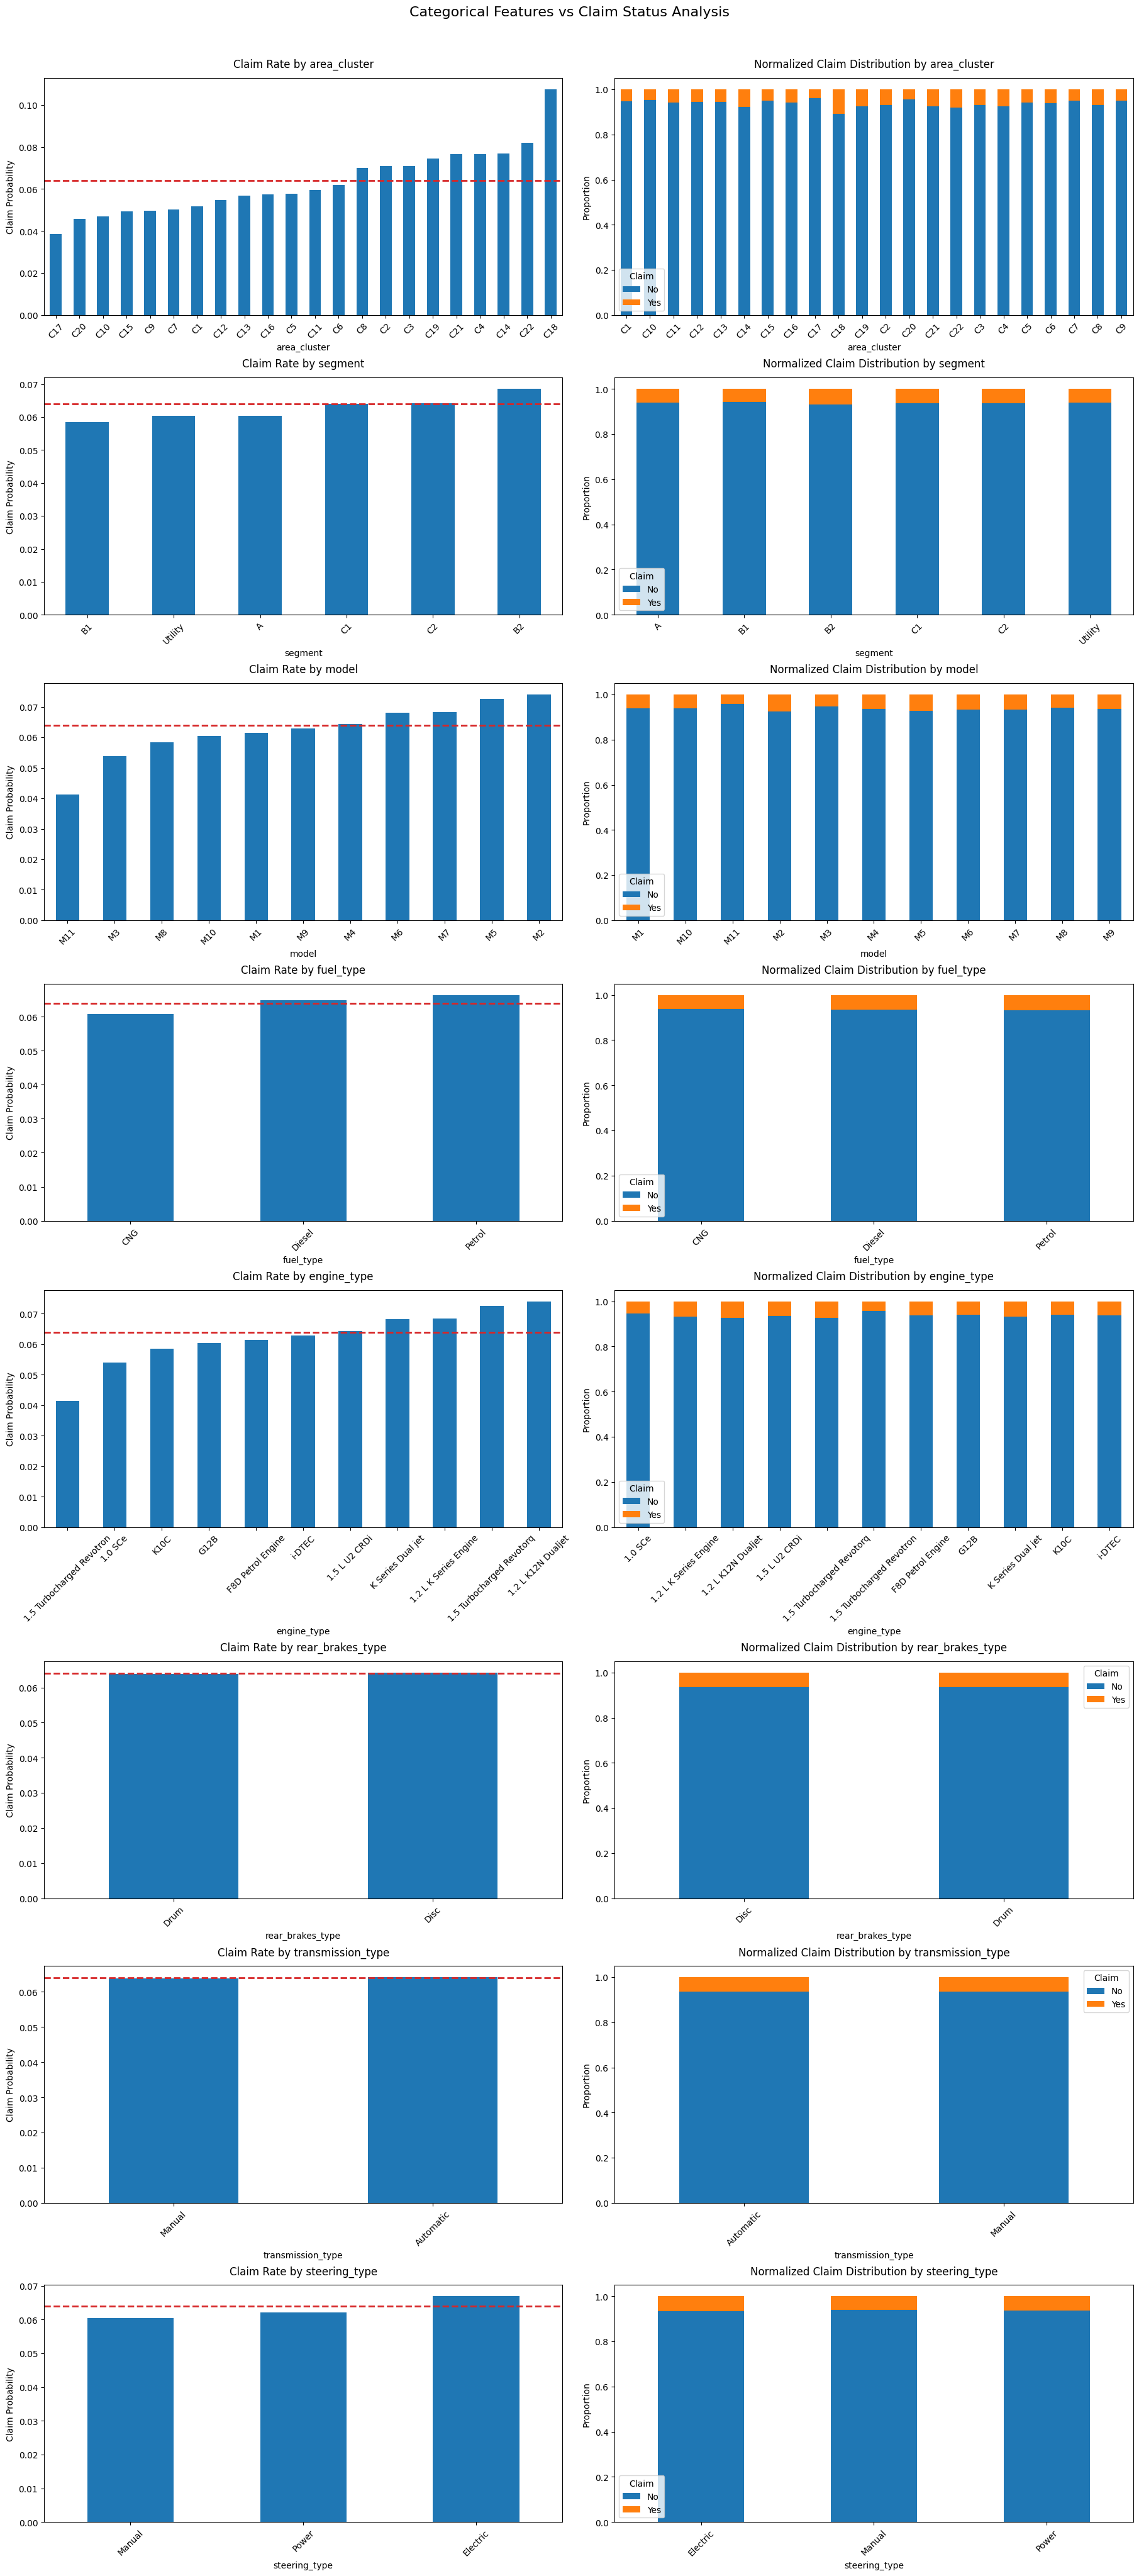

In [27]:
dp.plot_categorical_vs_target(train_df, Categorical_train_features)

Most Predictive Categorical Features(Might Be):
* area_cluster
* model
* segment
* engine_type

Least Predictive Features(Might Be):
* steering_type	
* transmission_type
* fuel_type		
* rear_brakes_type

**3. Boolean Features Vs Target feature(is_claim)**

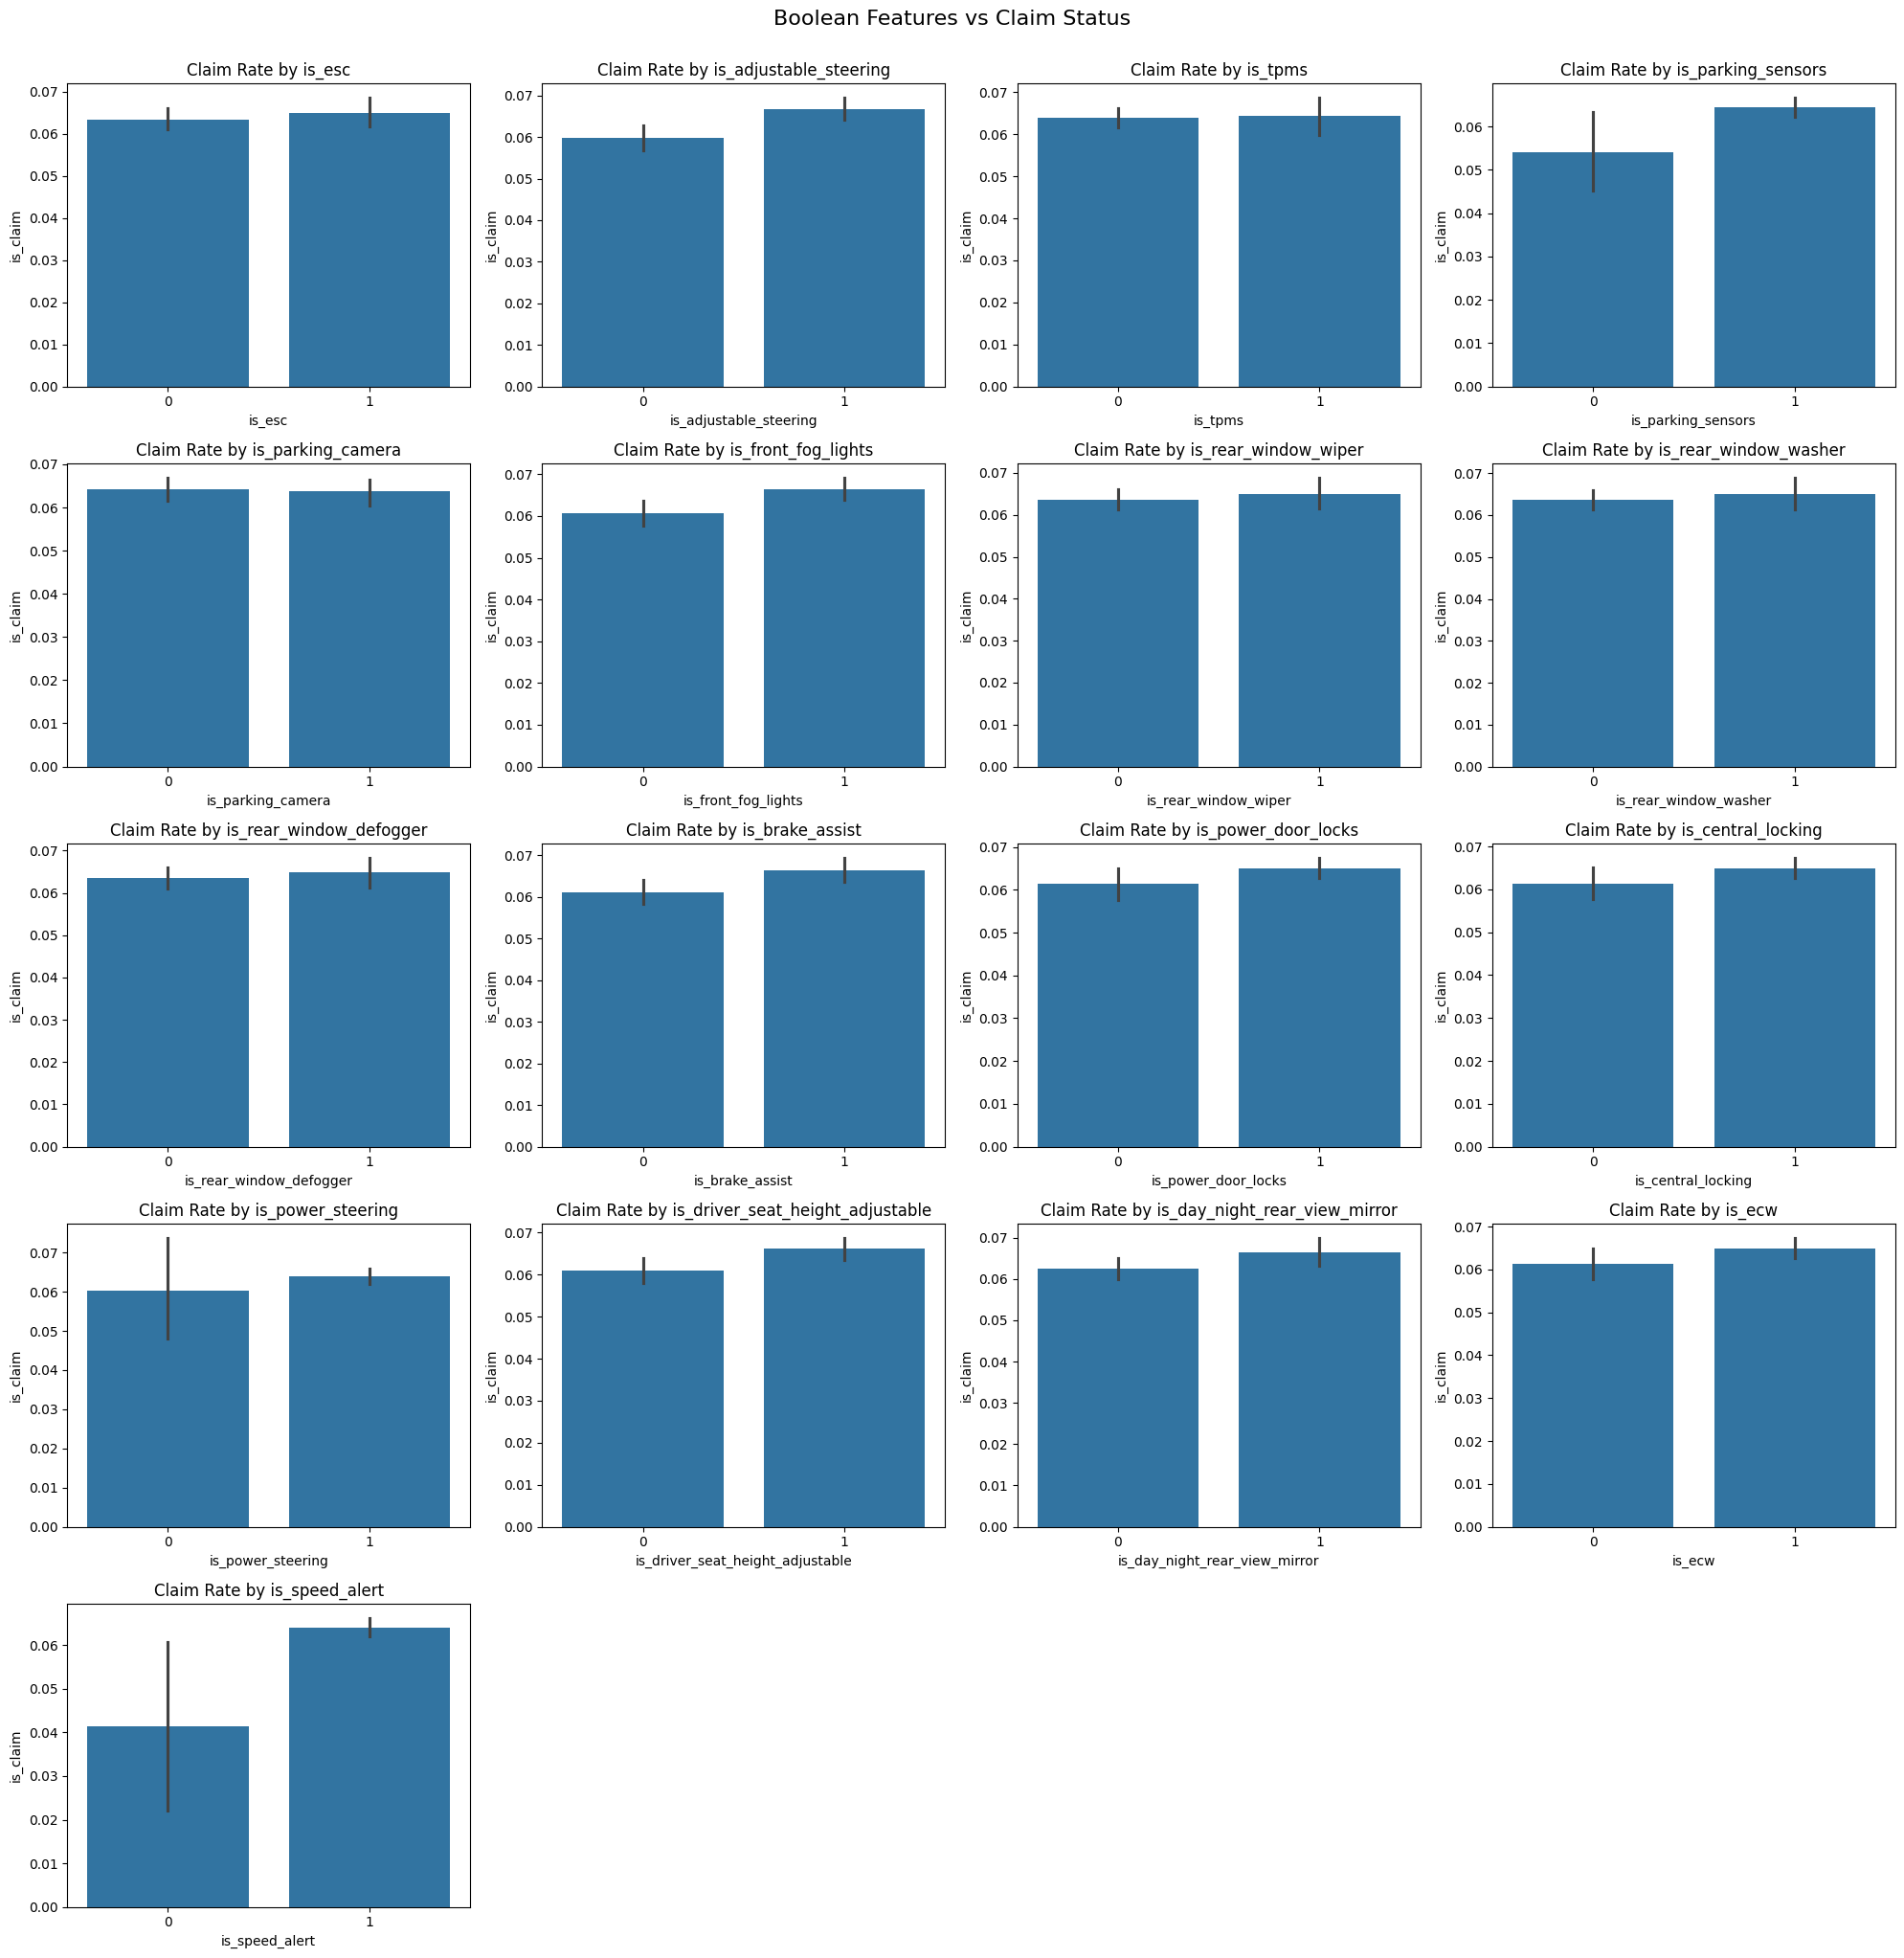

In [28]:
dp.plot_boolean_vs_target(train_df, Boolean_train_features)

Most Predictive Categorical Features(Might Be):
* is_brake_assist
* is_power_door_locks
* is_driver_seat_height_adjustable
* is_speed_alert
* is_ecw

Least Predictive Features(Might Be):
* is_esc
* is_adjustable_steering
* is_tpms
* is_parking_sensors
* is_parking_camera
* is_front_fog_lights
* is_rear_window_wiper
* is_rear_window_washer
* is_rear_window_defogger
* is_central_locking
* is_power_steering
* is_day_night_rear_view_mirror

**4. Age Analysis**

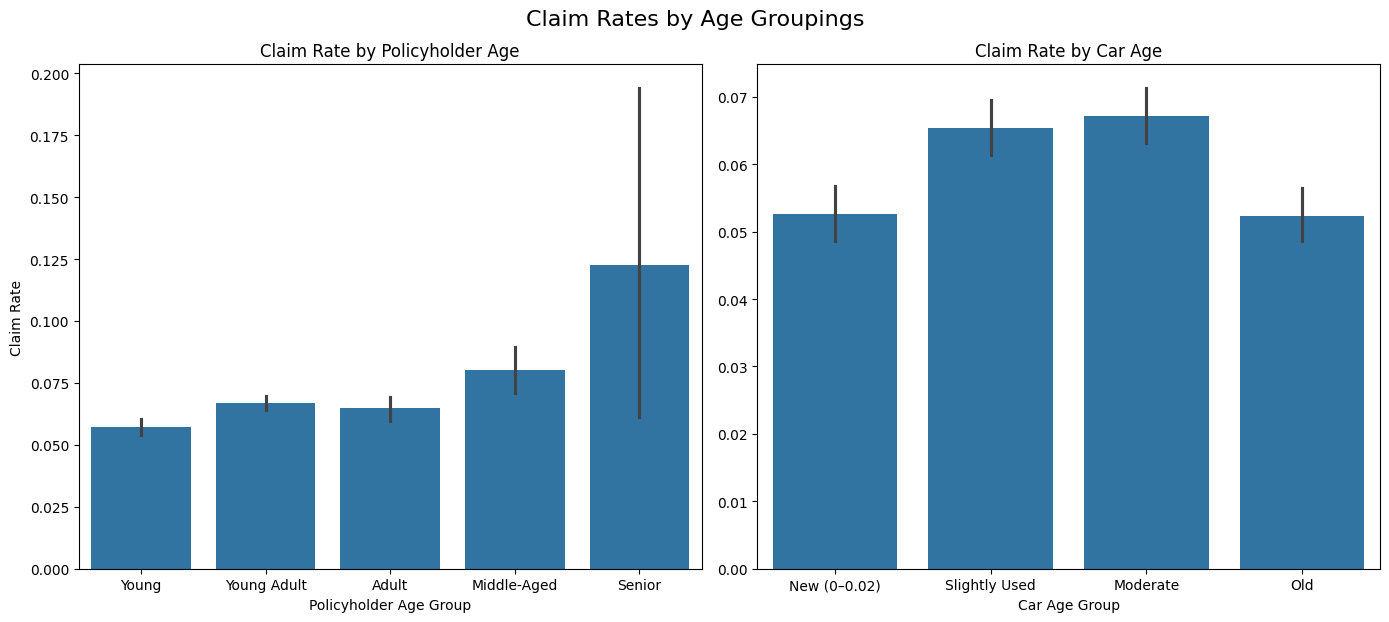

In [29]:
dp.plot_grouped_age_vs_target(train_df)

**5. Power & Torque**

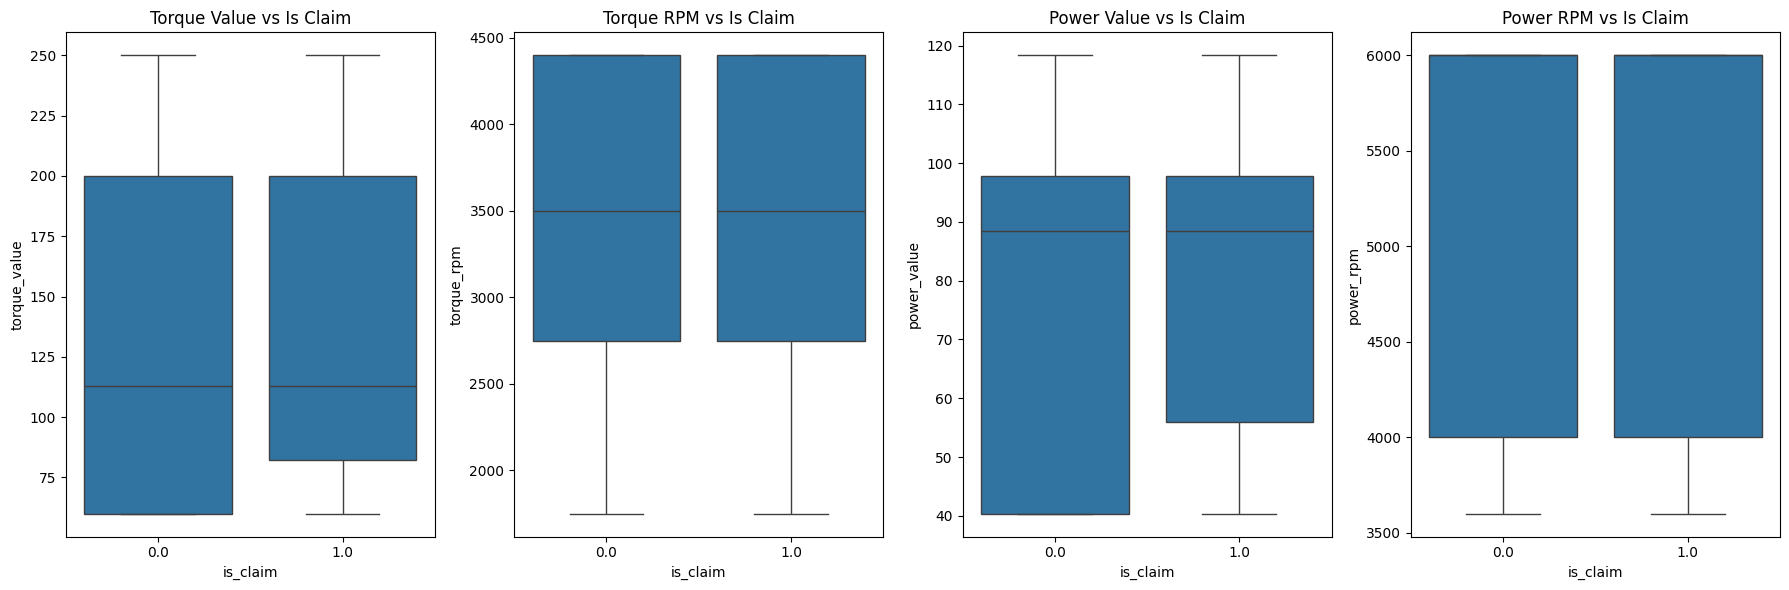

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))  # Adjusted to 4 rows and 1 column for clarity

sns.boxplot(data=train_df, x='is_claim', y='torque_value', ax=axes[0])
axes[0].set_title('Torque Value vs Is Claim')

sns.boxplot(data=train_df, x='is_claim', y='torque_rpm', ax=axes[1])
axes[1].set_title('Torque RPM vs Is Claim')

sns.boxplot(data=train_df, x='is_claim', y='power_value', ax=axes[2])
axes[2].set_title('Power Value vs Is Claim')

sns.boxplot(data=train_df, x='is_claim', y='power_rpm', ax=axes[3])
axes[3].set_title('Power RPM vs Is Claim')

plt.tight_layout()
plt.show()


**6. Important Features Analysis (Numerical)**

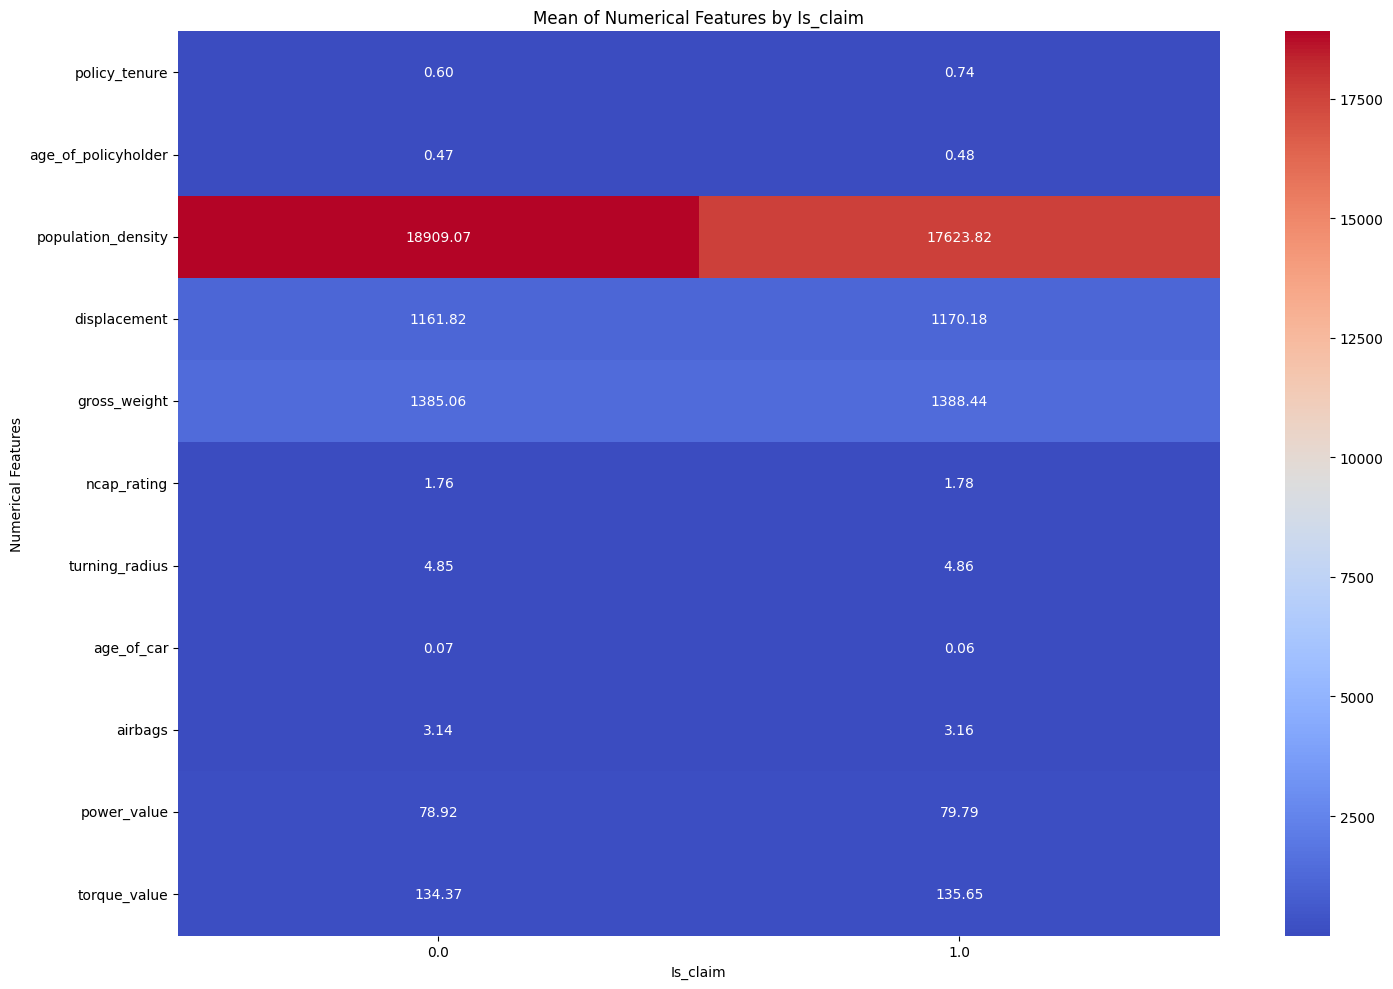

In [31]:
num_features = ['policy_tenure','age_of_policyholder', 'population_density', 'displacement', 'gross_weight',
                'ncap_rating', 'turning_radius', 'age_of_car', 'airbags','power_value','torque_value']

dp.plot_grouped_means_heatmap(train_df, num_features)

**7. Important Feature Analysis (Categorical Features)**

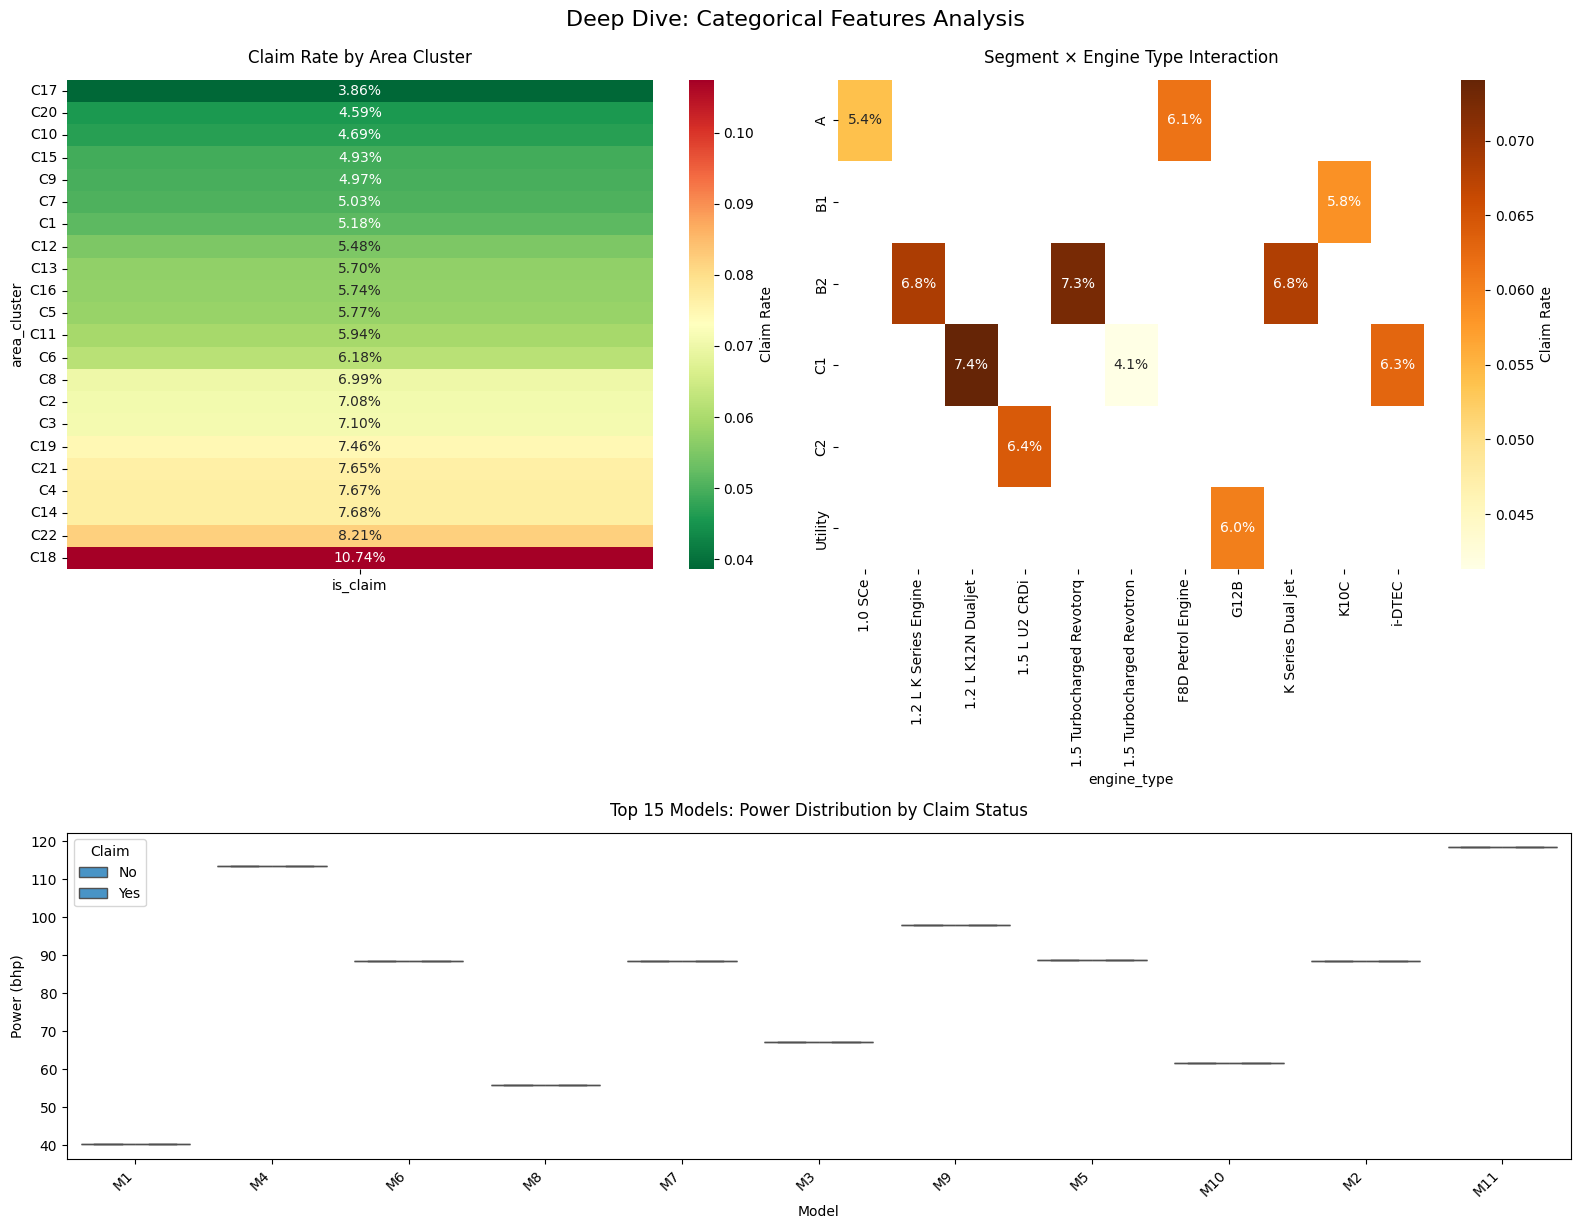

In [32]:
dp.deep_dive_categorical_analysis(train_df)

**8. Boolean Safety Features**

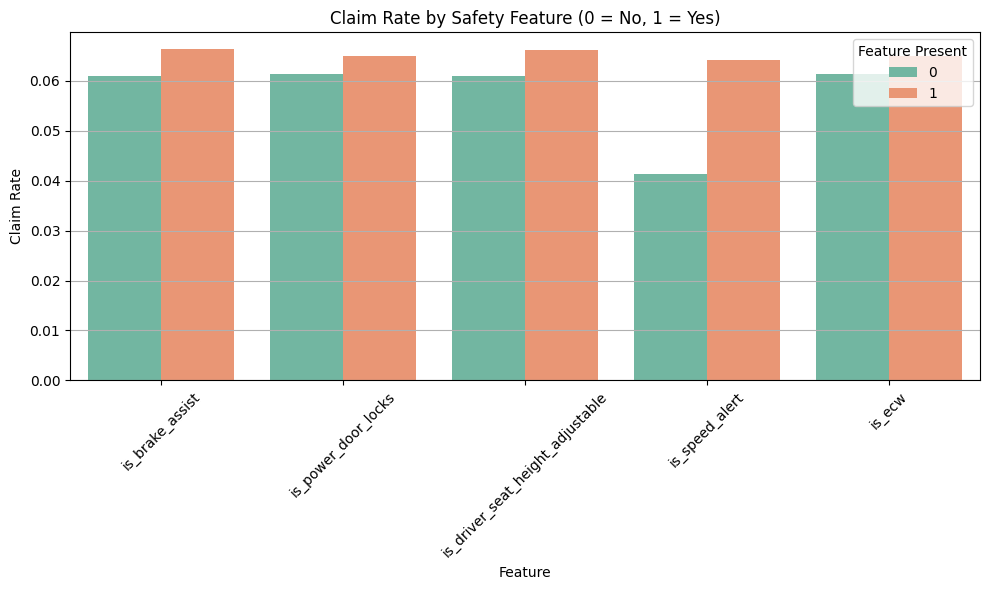

In [33]:
bool_features = [
    'is_brake_assist',
    'is_power_door_locks',
    'is_driver_seat_height_adjustable',
    'is_speed_alert',
    'is_ecw'
]

dp.plot_boolean_feature_claim_rates(train_df, bool_features)

### 2.3 🌈Multivariate Analysis
**░ Pairwise plots for numerical columns.**

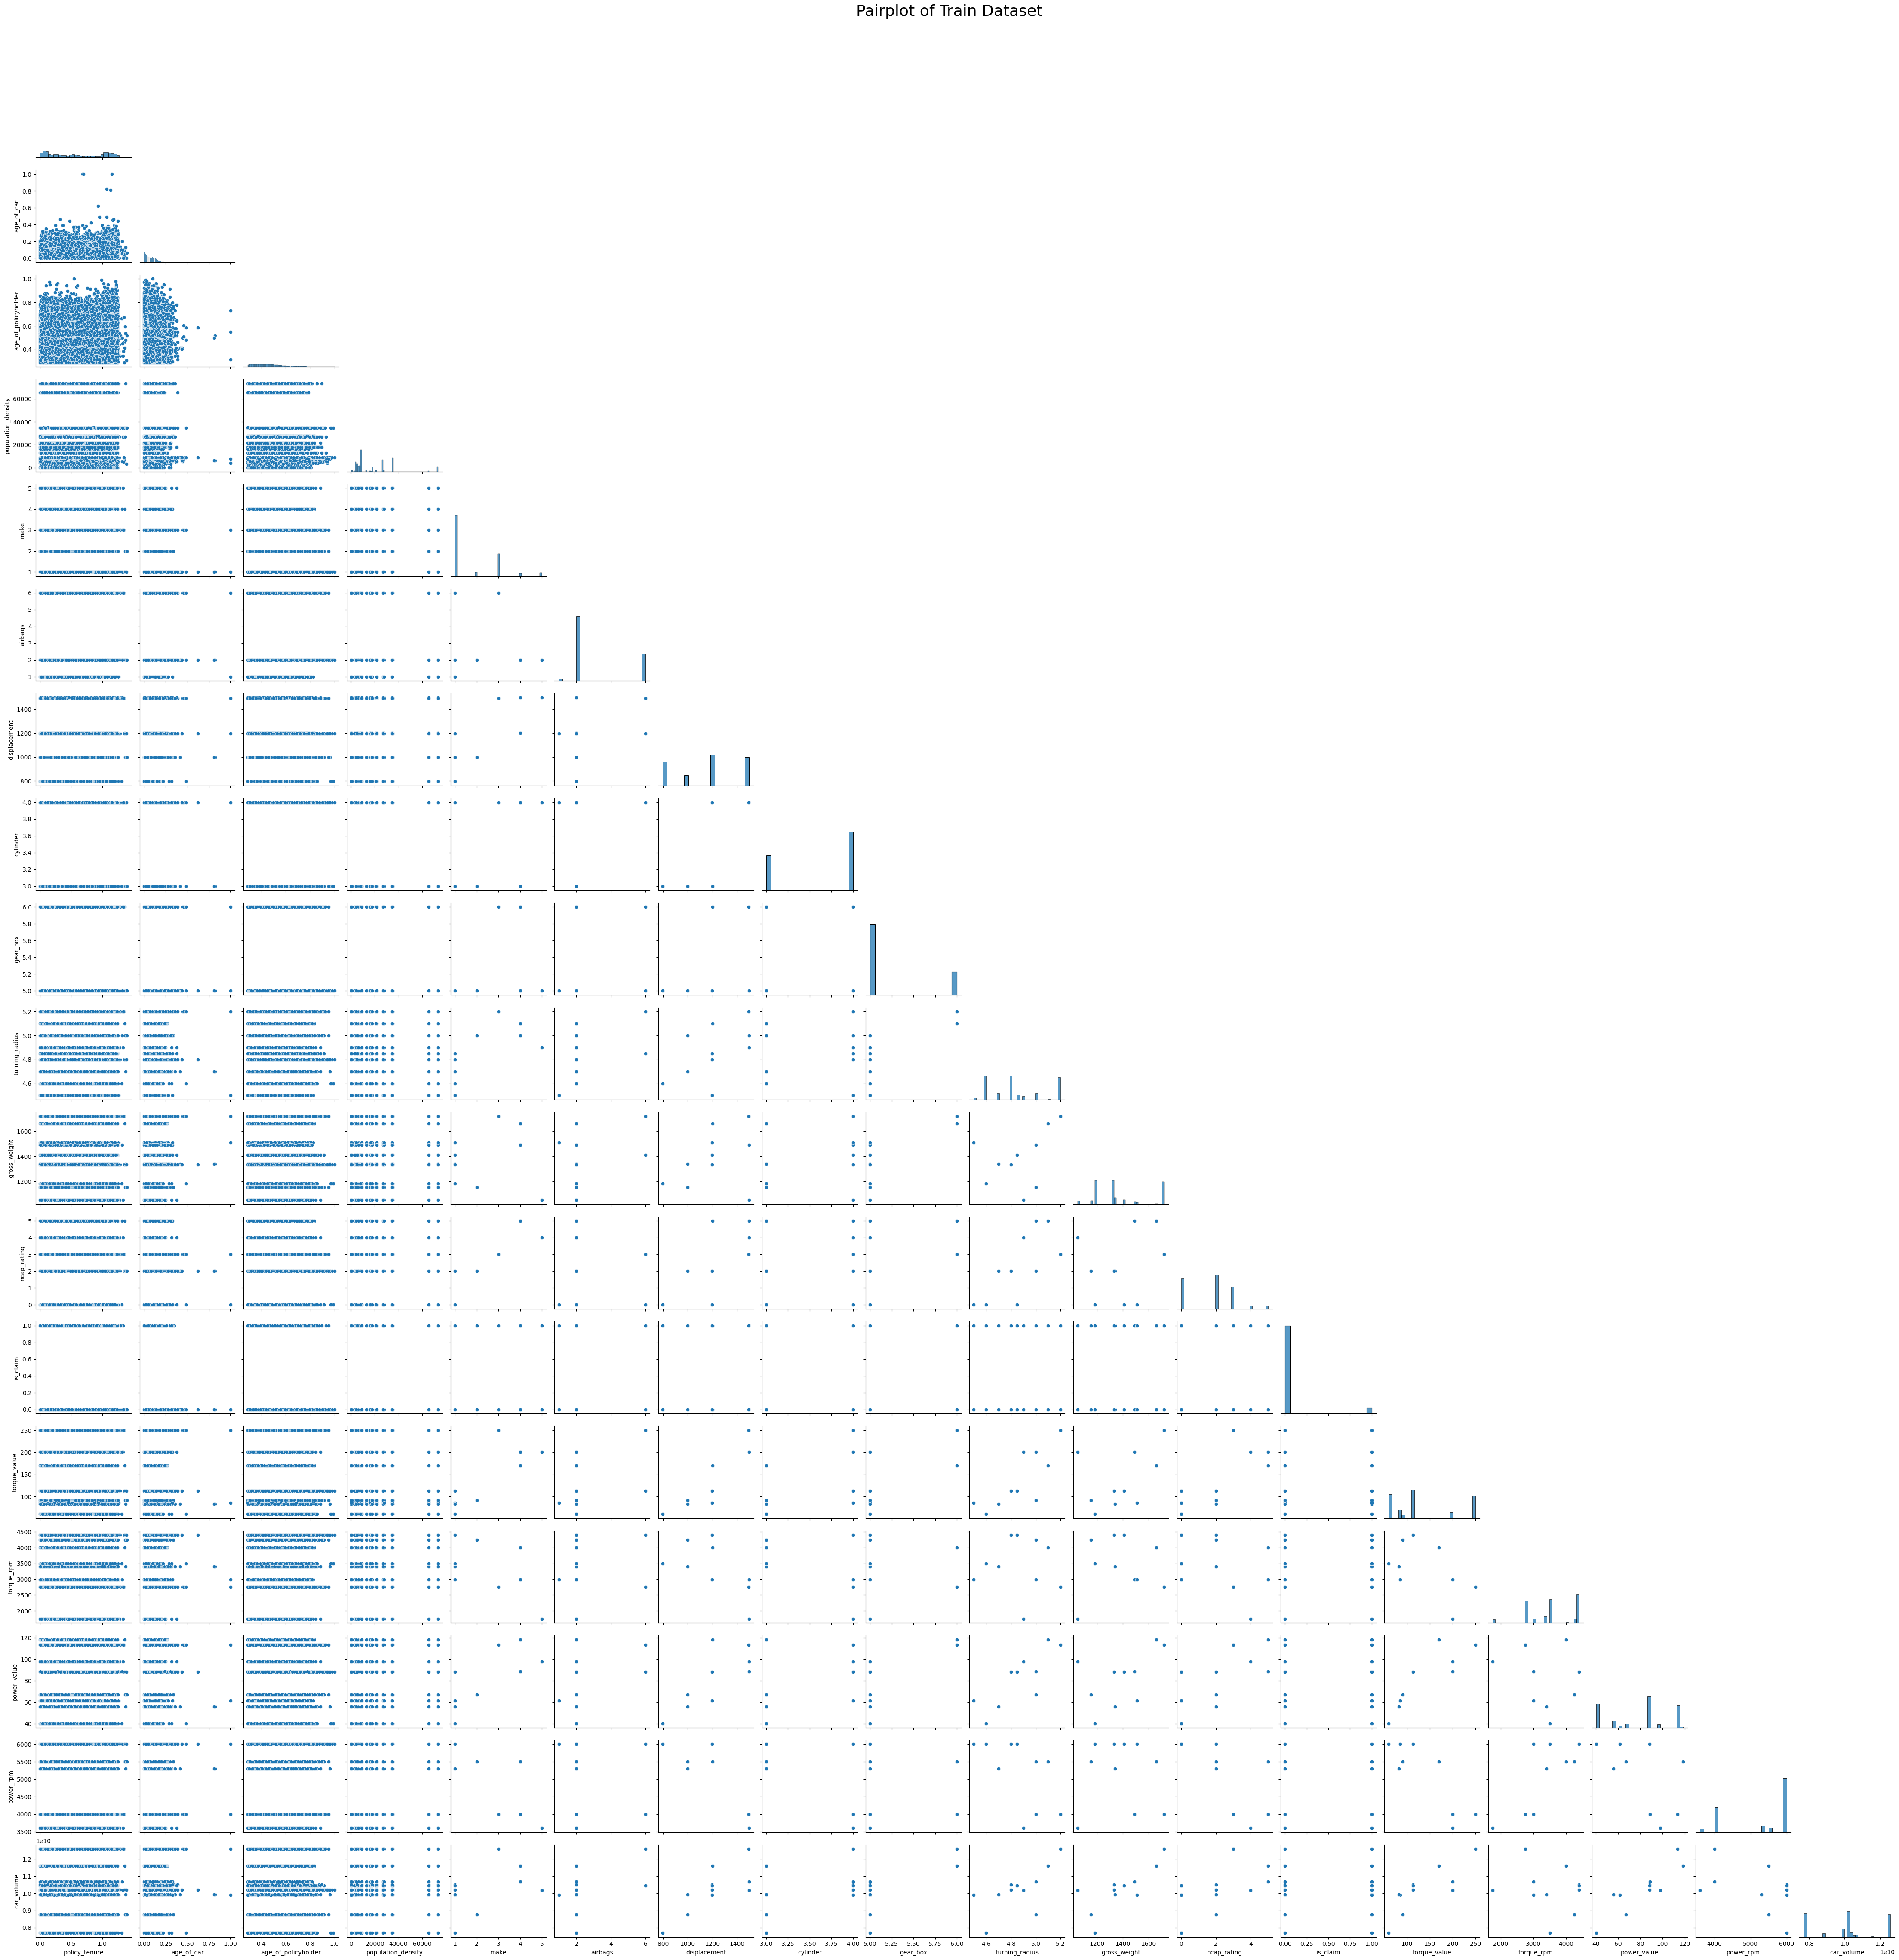

In [34]:
# Pairplot for train data
sns.pairplot(Numeric_train_df, corner=True)
plt.suptitle("Pairplot of Train Dataset", y=1.02, fontsize=26)
plt.show()

## **3. 🎨 Preprocessing (After EDA)**

In [35]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   engine_type                       58592 non-null  object 
 10  airbags                           58592 non-null  float64
 11  is_esc                            58592 non-null  int8   
 12  is_a

#### 3.1. 📌Handle Outliers

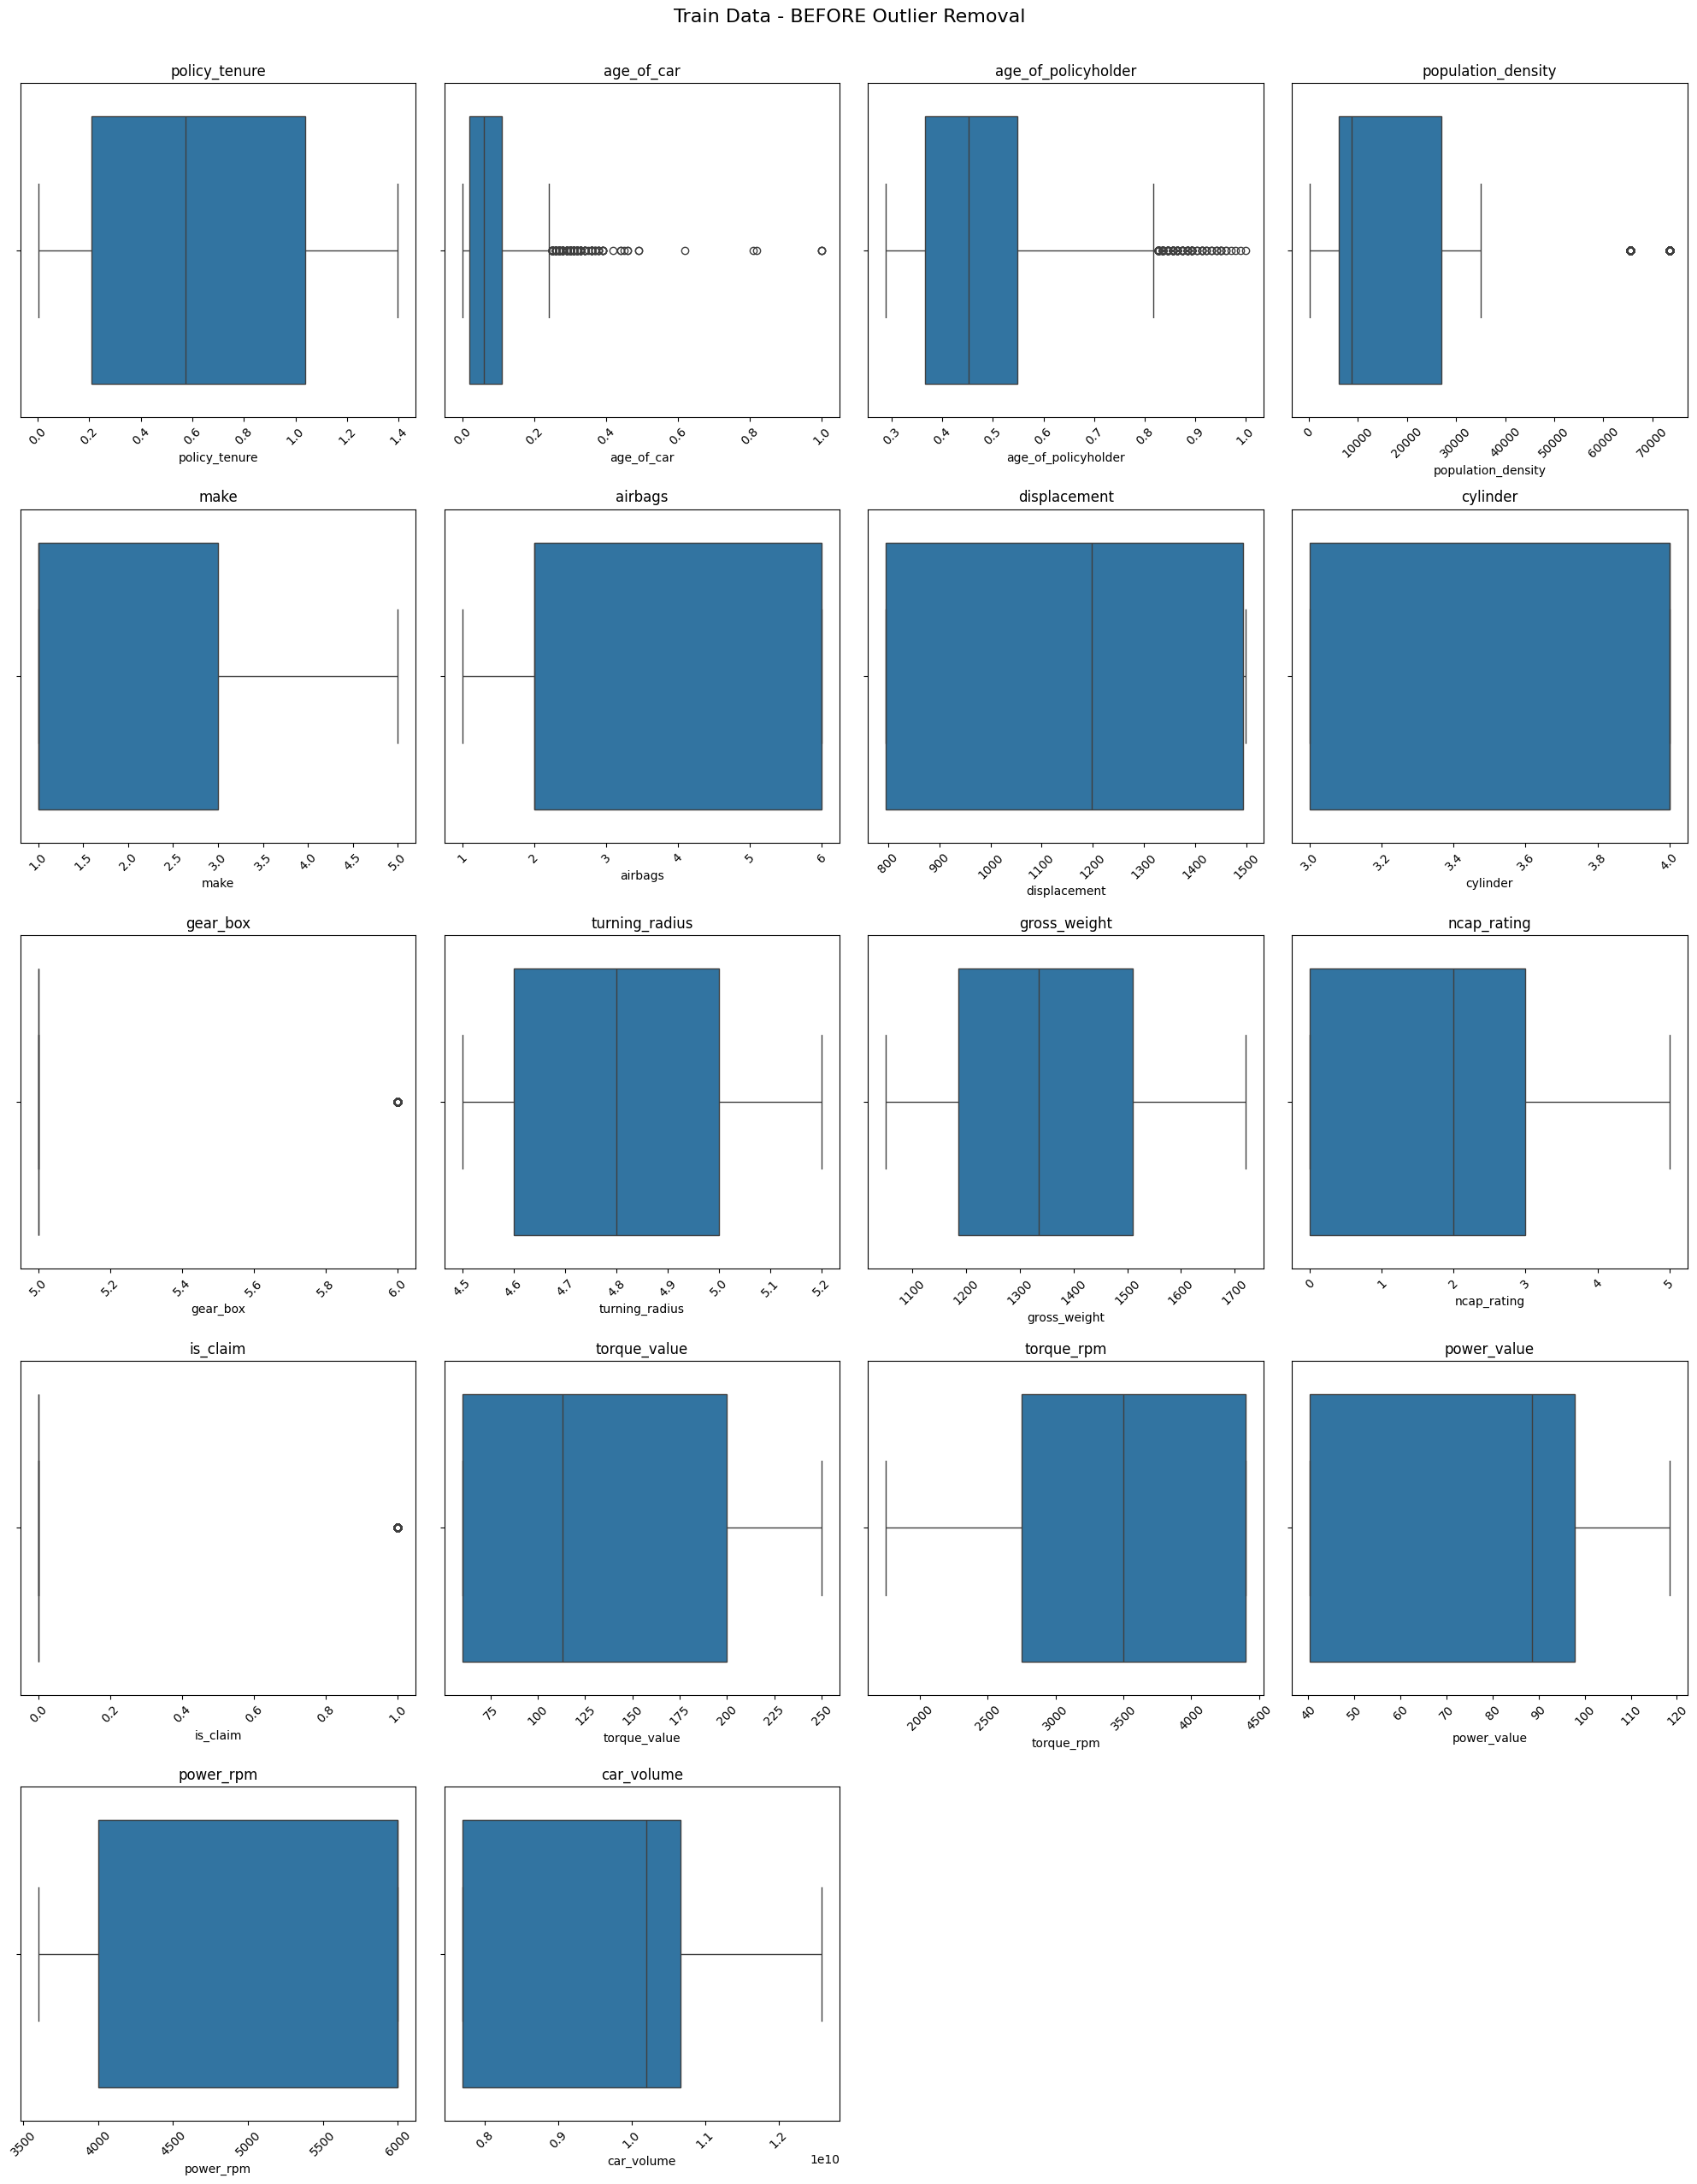

In [36]:
# Example for train data
train_df = dp.handle_outliers(train_df, dataset_name='Train Data')
test_df = dp.handle_outliers(test_df, dataset_name='Test Data', show_plots=False)

From the boxplots, can be observe:
* Most numerical features show data concentrated within reasonable ranges.
* There are very few extreme values, and even those do not appear to be extreme in a problematic way.
* The boxplots show only modest whisker extensions or minor individual points — nothing dramatic.


This suggests that:
* Outlier removal may not be necessary for this dataset.
* Removing them could risk discarding valid rare cases that are useful for modeling (especially for classification tasks like fraud or claim detection, where rare events matter).

#### 3.2 🛠️Encode categorical data

In [37]:
# Check for outliers in train data
train_df = dp.encode_categorical_data(train_df)
train_df.info()
display(train_df.head())

# Check for outliers in test data
test_df = dp.encode_categorical_data(test_df)
test_df.info()
display(test_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int64  
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int64  
 7   model                             58592 non-null  int64  
 8   fuel_type                         58592 non-null  int64  
 9   engine_type                       58592 non-null  int64  
 10  airbags                           58592 non-null  int64  
 11  is_esc                            58592 non-null  int8   
 12  is_a

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231             0   
1       0.672619        0.02             0.375000            11   
2       0.841110        0.02             0.384615            15   
3       0.900277        0.11             0.432692            16   
4       0.596403        0.11             0.634615            17   

   population_density  make  segment  model  fuel_type  engine_type  ...  \
0              4990.0     0        0      0          0            6  ...   
1             27003.0     0        0      0          0            6  ...   
2              4076.0     0        0      0          0            6  ...   
3             21622.0     0        3      3          2            2  ...   
4             34738.0     1        0      4          2            0  ...   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1          0.0   
1                              0       0               1          0.0   
2                              0       0               1          0.0   
3                              1       1               1          1.0   
4                              1       1               1          1.0   

   is_claim  torque_value  torque_rpm  power_value  power_rpm    car_volume  
0       0.0          60.0        3500        40.36       6000  7.698283e+09  
1       0.0          60.0        3500        40.36       6000  7.698283e+09  
2       0.0          60.0        3500        40.36       6000  7.698283e+09  
3       0.0         113.0        4400        88.50       6000  1.050096e+10  
4       0.0          91.0        4250        67.06       5500  8.777961e+09  

[5 rows x 43 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     39063 non-null  float64
 1   age_of_car                        39063 non-null  float64
 2   age_of_policyholder               39063 non-null  float64
 3   area_cluster                      39063 non-null  int64  
 4   population_density                39063 non-null  float64
 5   make                              39063 non-null  int64  
 6   segment                           39063 non-null  int64  
 7   model                             39063 non-null  int64  
 8   fuel_type                         39063 non-null  int64  
 9   engine_type                       39063 non-null  int64  
 10  airbags                           39063 non-null  int64  
 11  is_esc                            39063 non-null  int8   
 12  is_a

policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.341732        0.00             0.586538            15   
1       0.307241        0.13             0.442308            20   
2       0.327924        0.12             0.451923            20   
3       0.782654        0.01             0.461538            17   
4       1.233404        0.02             0.634615            17   

   population_density  make  segment  model  fuel_type  engine_type  ...  \
0              4076.0     0        0      0          0            6  ...   
1              8794.0     0        2      7          2            8  ...   
2              8794.0     1        0      4          2            0  ...   
3             34738.0     0        0      0          0            6  ...   
4             34738.0     0        0      0          0            6  ...   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 1                              1       1   
2                                 0                              1       1   
3                                 0                              0       0   
4                                 0                              0       0   

   is_speed_alert  ncap_rating  torque_value  torque_rpm  power_value  \
0               1          0.0          60.0        3500        40.36   
1               1          1.0         113.0        4400        88.50   
2               1          1.0          91.0        4250        67.06   
3               1          0.0          60.0        3500        40.36   
4               1          0.0          60.0        3500        40.36   

   power_rpm    car_volume  
0       6000  7.698283e+09  
1       6000  1.020674e+10  
2       5500  8.777961e+09  
3       6000  7.698283e+09  
4       6000  7.698283e+09  

[5 rows x 42 columns]

In the dataset, the ordinal column 'ncap_rating' has been handled using label encoding, and the nominal categorical columns 'fuel_type', 'model', 'segment', 'area_cluster', 'engine_type', 'transmission_type', 'steering_type', and 'rear_brakes_type' have also been encoded with label encoding. Since tree-based models (such as Random Forest and XGBoost) do not rely on numeric relationships in encoded labels, label encoding is suitable for this setup. Binary columns were addressed during the initial feature engineering steps, which took place prior to exploratory data analysis (EDA), allowing insights to be gained through data visualization.

### 3.3. 🔄 Feature Scaling

In [38]:
# Separate target
y_train = train_df['is_claim']
X_train = train_df.drop(columns='is_claim')

# Scale features
X_train, scaler = dp.scale_important_features(X_train)


In [39]:
# Final scaling using scaler from training
X_test = dp.scale_important_features(test_df, scaler=scaler)

This step is designed to standardize selected numeric features to ensure fair contribution to machine learning models. Its primary goal is to apply consistent scaling to both training and test datasets, which is essential for models that are sensitive to feature magnitudes. The function uses StandardScaler, a technique that transforms features to have a mean of zero and a standard deviation of one ideal for features that are approximately normally distributed. By focusing on a set of domain relevant numeric columns, the function avoids unnecessary transformations and keeps the data preparation efficient. Additionally, it includes a safeguard by filtering out any columns that may have been dropped earlier in the pipeline, enhancing its robustness and preventing errors during execution.

## 4. ⚠️ Save Data 

In [40]:
# Save cleaned data
# Combine balanced features and labels back into a DataFrame
train_clean_df = pd.DataFrame(X_train, columns=X_train.columns)
train_clean_df['is_claim'] = y_train

# Save to CSV
train_clean_df.to_csv('../data/processed/cleaned_train_data.csv', index=False)
# Save test data
# Assuming test_df is already preprocessed (imputed, encoded, scaled)
test_clean_df = pd.DataFrame(X_test, columns=X_train.columns)  # Use same columns as X_train
assert list(test_clean_df.columns) == list(X_train.columns), "Feature mismatch between train and test sets!"

# Save to CSV
test_clean_df.to_csv('../data/processed/cleaned_test_data.csv', index=False)

In [41]:
train_clean_df.info()
test_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  int64  
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  int64  
 6   segment                           58592 non-null  int64  
 7   model                             58592 non-null  int64  
 8   fuel_type                         58592 non-null  int64  
 9   engine_type                       58592 non-null  int64  
 10  airbags                           58592 non-null  float64
 11  is_esc                            58592 non-null  int8   
 12  is_a

## ✅ Conclusion

Having completed data preprocessing, EDA, and preprocessing steps (such as handling outliers, encoding categorical data,  and scaling features). The cleaned data such as cleaned_train_data and cleaned_test_data has been saved in the 'data/processed' folder for future usage.